Импорт библиотек. (Логичней было бы поставить его в начале разбора, но я не знаю, как лучше)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from plotly import graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

import statsmodels.api as sm

import seaborn as sns

import scipy.stats as stats

from scipy.stats import chi2_contingency

import uuid
 
from sklearn.preprocessing import Normalizer

import pingouin as pg
import missingno as msno

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

%matplotlib inline

Дополнительные настройки

In [960]:
pd.set_option('display.max_columns', None)
#sns.set_style("whitegrid", {'axes.grid' : False})

#  Домашняя работа по EDA 

### EDA

Подход EDA - это именно то, что - подход - не набор методов, а отношение/философия о том, как должен проводиться анализ данных.

Что я планирую сделать в этом ноутбуке

    1. Понимание проблемы. Мы посмотрим на каждую переменную и посмотрим, её важность для решаемой нами проблемы
    2. Univariable study. Я сфокусируюсь на целевой переменной (y) и попробую узнать про нее немного больше. 
    3. Multivariate study. Мы попробуем понять, какие взаимосвязи существуют между зависимымы и независимой переменными. 
    4. Базовая очистка. Я почищу датасет, чтобы обработать пропущенные значения, выбрасы, и категориальные фичи.
    5. Тест предположений. Я проверю основные предположение, которые требуются большинством Multivariate study техник.


## Обзор 

В этой задачи, я буду рассматривать датасет про телефонный банковский маркетинг португальского банковского института, то есть про телефонные звонки из или в банк в Португалии. В этом датасете целевой переменной является оформит ли клиент банковские долгосрочные вклады. 

Датасет основан на UCI(University of California, Irvine) датасете "Bank Marketing". [UCI](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

В июне 2014 года, в журнале "Decision Support Systems" вышла статья от авторов Sérgio Moroa, Paulo Cortezb, Paulo Ritaa под заголовком "A data-driven approach to predict the success of bank telemarketing", где рассказывалось о создании данного датасета и последующей работы с ним. 

Им был нужен датасет для исследовании баковского телефоного маркетинга с целью предсказать продажи банковских долгосрочных вкладов. Они связались с Португальским **розничным** банком, который предоставил им данные собранные **с 2008 по 2013** года, в которых также набюдался эффект от **финансового кризиса** тех лет.

**То есть, все данные были полученны во время Мирового Финансового Кризиса.**


### Финансовый криз

В статье упоминается Мировой экономический кризис с 2008. Я преведу лишь общее описание, того что случилось в эти годы, для лучшего понимания, что происходило в эти годы. Интересно посмотреть, как кризис повлиял на спрос на долгосрочные банковские депозиты, но я думаю, что для такого анализа, нам потребуются дополнительные данные, так как в этом датасете нет данных по дате. 

Мировой экономический кризис — кризисное состояние мировой экономики, резко обозначившееся с 2008 года. Разные страны и регионы выходили из острой фазы кризиса в разное время, с 2009 по 2013 год, а его последствия сохраняются поныне. Развился с финансового кризиса, начавшегося в США. Если не по глубине, то по масштабам и последствиям сопоставим лишь с Великой депрессией 1930-х годов. В 2009 году мировой ВВП впервые со времён Второй мировой войны показал отрицательную динамику.

Также рекордно (более чем на 10 %) сократилась мировая торговля, восстановившая объём к 2011 году, но до сих пор значительно отстающая от докризисных темпов роста.

Спад экономики США и еврозоны закончился во втором квартале 2009 года, однако в 2011 году в еврозоне началась вторая рецессия, продолжавшаяся до 2013 года и ставшая самой длительной в её истории.

Глобальной тенденцией после острой фазы кризиса в 2008 году стало ослабление среднего класса в мире, в то время как до кризиса его доля в общем объёме мирового богатства оставалась продолжительное время стабильной, отмечается в отчёте «Global Wealth Report 2015» швейцарского банка «Credit Suisse». При этом доля 1 % самых богатых людей в мировом объёме богатств превысила 50 % и продолжает увеличиваться.

Беспрецедентный рост безработицы привёл к достижению её рекордного показателя за всю историю наблюдений за рынком труда (200 млн человек в 2009 году).



### Розничный банк

Розничное банковское обслуживание, также известное как потребительское банковское обслуживание, представляет собой оказание банком услуг широкой общественности, а не компаниям, корпорациям или другим банкам, которые часто называют оптовым банковским обслуживанием. Банковские услуги, которые рассматриваются как розничные, включают предоставление сберегательных и операционных счетов, ипотечных кредитов, личных кредитов, дебетовых карт и кредитных карт. Розничный банкинг также отличается от инвестиционного банкинга или коммерческого банкинга. Это также может означать подразделение или отдел банка, который имеет дело с индивидуальными клиентами.

### Маркетинговые кампании

Маркетинговые торговые кампании представляют собой типичную стратегию по расширению бизнеса.Компании используют прямой маркетинг, ориентируясь на сегменты клиентов, связываясь с ними для достижения конкретной цели. Централизация удаленного взаимодействия с клиентами в контакт-центре упрощает оперативное управление кампаниями. Такие центры позволяют общаться с клиентами по различным каналам, одним из наиболее широко используемых является телефон (стационарный или мобильный). Маркетинг, осуществляемый через контакт-центр, называется телемаркетингом из-за характеристики удаленности. Контакты могут быть разделены на входящие и исходящие, в зависимости от того, какая сторона инициировала контакт (клиент или контактный центр), при этом каждый случай создает различные проблемы (например, исходящие из банка звонки, часто считаются более нежелательными для клиента). Технология позволяет переосмыслить маркетинг, сосредоточив внимание на максимизации длинны взаимодействия с клиентом за счет оценки доступной информации и показателей клиента, что позволяет создавать более длительные и тестные отношения в соответствии с бизнес-спросом. 
 
Кроме того, следует подчеркнуть, что задача выбора лучшего набора клиентов, т.е. тех, которые более склонны подписываться на продукт, описывается как NP-hard в статье "Optimization modelsfor targeted offers in direct marketing: Exact and heuristic algorithms" от 2011 года.



### Банковские данные телемаркетинга

В рамках кампании операторы звонят по списку для продажи депозита (исходящий) или, если клиент звонит в контакт-центр по какой-либо другой причине, его просят подписаться на депозит (входящий). Таким образом, результатом является бинарный неудачный или успешный контакт.

Тут мы можем понять, что банк уже имел информацию о клиентов, получив ее предыдидущими взаимодействиями с ними, или, вероятно, каким-нибудь другим способом.

### Банковский долгострочный депозит

К сожалению в датасете нет описание, какие были предлагаемые условия депозита, менялись ли они в зависимости от клиентов и от времени. Было бы интересно посмотреть на целевую переменную, в зависимоти от различных условий вклада, но так как такой информации нет. Так же у нас нет информации о операторе звонка, его пола и опыта.

В связи с этим я буду считать за банковский депозит, депозит на длительное время с неопределенными условиями от неизвестного оператора.


#### О вкладе
Долгосрочные вклады в банках по сути относятся к стратегическим сбережениям и открываются в банке от года и более. Наряду с повышенными процентами, которые гарантируют пассивный доход, они несут и повышенные риски. Известны такие случаи, когда долгосрочные вклады в банках хранились больше десятка лет.


## Отбор переменных

Для нашего анализа также интересно, каким образом выбирались переменные для исследования, о котором было рассказано в статье. Я опишу это кратко, так как более детельно все расписано в самой статье. 

Для отбора фич использовался полуавтоматический метод. Был привлечен эксперт из области банковского маркетинга, и точно определены цели последующего исследования. То есть вопросы, на которые исследователи хотели ответить при помощи данных. Ниже я приведу список вопросов. К сожалению в статье не описано, какие точно переменные были выбраны для тех или иных вопросов. 

|  Вопрос | Число переменных  |
|:---|---|
|1. Релевантен ли предлагаемый тариф?   |  5 |
|2. Релевантен ли пол?  | 3 |
|3. Важен ли опыт оператора?   |  3 |
|4. Релевантны ли социальный статус и стабильность?| 5 |
|5. Релевантны ли отношения между клиентом и банком?| 11 |
|6. Релевантны ли блоки банки (Ограничения на провеведение некоторых операций)? | 6|
|7. Релевантент ли контекст телефонного звонка? |4|
|8. Релевантны ли дата и время? | 3|
|9. Релевантны ли показатели профилирования банков?|7|
|10. Релевантны ли социально-экономические показатели? |11| 
|11. Являются ли финансовые активы релевантными?| 3|
|12. Является ли район проживания актуальным?| 1 |
|13. Может ли возраст быть связан с продуктами с более длительными периодами?|3|
|14. Релевантны ли хиты веб-страниц (для кампаний, отображаемых на веб-сайтах банков)?| 4 |
|--------------------|-------------------------|
|Количество фичей после выбора бизнес-знаний| 69 |
|Количество фичей после первой фазы выбора элемента|22| 

Как мы увидим далее, многие из этих вопросов так и не были представленны в датасете, в связи с тем, что он, в основном, содержит информацию о клиенте, компании и социальной обстановки

#### Дополнение

Датасет был обогащен добавлением пяти новых социально-экономических признаков/атрибутов (общегосударственные показатели из страны с населением ~10 млн человек), опубликованных банком Португалии и общедоступных по адресу: https://www.bportugal.pt/estatisticasweb.

# Список всех переменных в датасете (без перевода на русский)

## Input variables:

   **bank client data:**
   
    Основное описание клиента, видимо основанное на данных, которые предоставил клиент в банк, или полученное из других источников.
    
    1. age (numeric)
    2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    5. default: has credit in default? (categorical: "no","yes","unknown")
    6. housing: has housing loan? (categorical: "no","yes","unknown")
    7. loan: has personal loan? (categorical: "no","yes","unknown")
   
   **related with the last contact of the current campaign:**
   
       Информация, связанная с последним контактом в рекламной компании.
   
    8. contact: contact communication type (categorical: "cellular","telephone") 
    9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    11.duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
   **other attributes:**
   
       Информация о самой компании
   
    12.campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14. previous: number of contacts performed before this campaign and for this client (numeric)
    15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
  
  **social and economic context attributes**
  
      Социальный и экономической контекст

    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17. cons.price.idx: consumer price index - monthly indicator (numeric)     
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)
    20. nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

    21. y - has the client subscribed a term deposit? (binary: "yes","no")

Разбор переменных ниже, сначала я хочу подгрузить датасет, и посмотреть его основные показатели

**Примечание**

Мы знаем, из текста приложенного к датасету, что это выборка из выборки. 

# Смотрим датасет 

In [961]:
df = pd.read_csv('data/row/bank-additional-full.csv', sep=';')

In [963]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [964]:
print("Shape of training data :", df.shape)

Shape of training data : (41188, 21)


Как мы видим, в датасете 21 фича и 41188 наблюдений

Из приложенной информации к датасету 

Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

In [965]:
df.isin(["unknown"]).sum(axis=0)

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

**ВЫВОД**

Скорее всего люди неохотно расскрывают информацию о том, если у них кредит или нет 

In [966]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Смотрим на тип целевой переменной. 

In [967]:
df['y'].dtype

dtype('O')

In [968]:
total = float(len(df))

In [969]:
def perc_for_chart(chart):
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center")  

# Разберем переменные подробней


## Bank client data

В этой группе представленны демографические характеристике, который или позвонил в банк, или был набран банком.

Все переменные этой группы являются категориальными, кроме возраста.  

### Age

Чтобы было можно наглядней посмотреть на зависимость между согласием открыть долгосрочный вклад и возрастом - разделим по возраст на демографические группы. Думаю, будет интересней, если не просто разбить на интервалы по разному возрасту, а посмотреть на разные поколения. То есть, нам будут интересны хронологические поколнения. 

Поколение - это объединение людей в границах конкретного возрастного интервала. 

Хронологическое поколение - совокупность людей, жизнедеятельность которых проявляется в данный момент времени.

[Статья про разницу между поколениями](https://prostudio.ru/journal/generation-x-y-z/)

В начале проверим, есть ли у нас странные записи, в которых возраст человека меньше 18 лет.

You must be aged at least 18 and provide proof of identity (e.g. a passport), your address in Portugal and your fiscal number. 

[Статья про требования в португальских банках](https://www.justlanded.com/english/Portugal/Portugal-Guide/Money/Accounts)

In [970]:
df[df['age'] < 18]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,no
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,yes
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,yes


Как мы видим, есть 5 таких звонков. Особенно интересный звонок под id = 39274, у студента уже был займ. 

**Мое предположение такое, что студенты сами звонили в банк, с просьбой открыть депозит. Но по фиче pdays мы видим, что в 3 из 5 случаев, это не было первым звонком в банк или из банка.** 

Проверим, как распределена эта величина, построив гистограмму

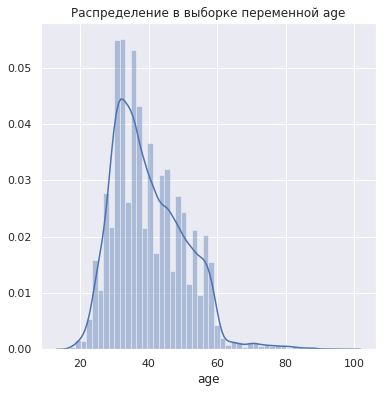

In [971]:
plt.figure(figsize=(6,6))
sns.distplot(df["age"])
plt.title('Распределение в выборке переменной age')
plt.show()

Так как у нас не может быть людей моложе 18 лет, и мало кто доживает до 100, то можно взять за приблизетельный средний возраст 40 лет. Из граффика видно, что в данную выборку попало больше людей 30 летнего возраста. Мы видим, что граффик немного похож на нормальное распределение. Он унимодален, и skewed в правую сторону. 

Можно сравнить эти данные с демографическим показателеми Португалии за эти года. 

#TODO: Если успею, то поищу датасет с этими данными 

Для проверки на нормальность построю QQ плот, так как объем выборки большой 

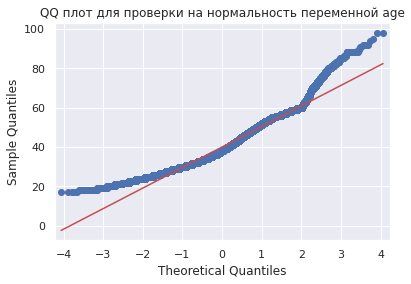

In [972]:
sm.qqplot(df['age'], line='s')
plt.title('QQ плот для проверки на нормальность переменной age')
plt.show()

**Вывод**

Видим, что переменная распределена не нормально, концы очень тяжелые 

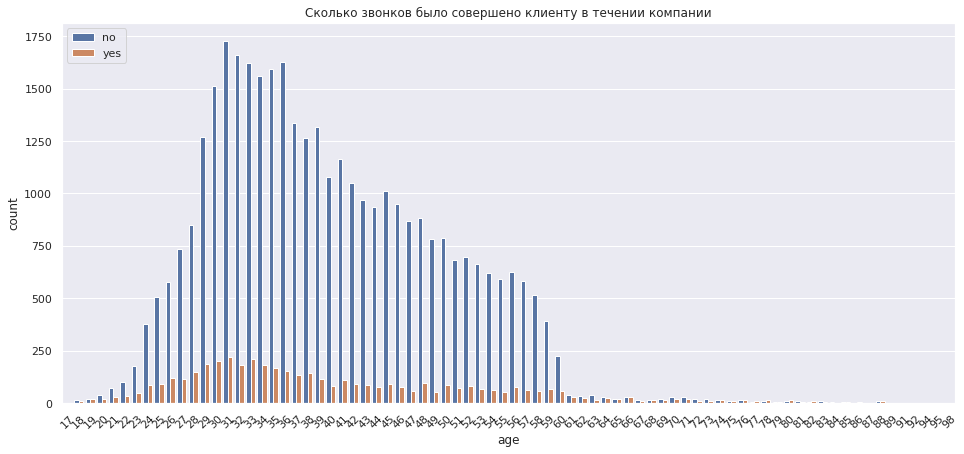

In [973]:
sns.set(rc={'figure.figsize':(16,7)})
chart = sns.countplot( df['age'],  hue = df['y'])

 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('Сколько звонков было совершено клиенту в течении компании')
plt.legend()
plt.show()



По такому графику трудно понять, что к чему, поэтому я разобью переменную на интервалы. 

In [974]:
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Видим, что среднее смещано вправо от медианы, значит есть skew в правую сторону, так же 75% процентиль далек от максимума, значит там есть выборосы, посмотрим на боксплот

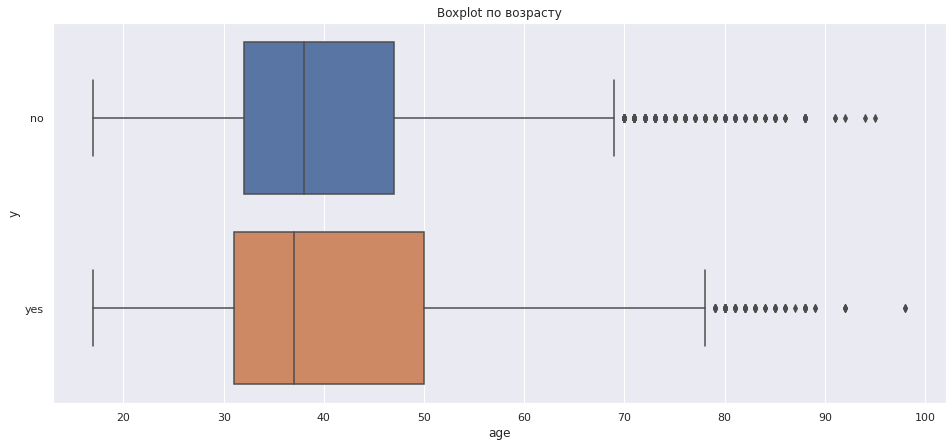

In [975]:
sns.set(rc={'figure.figsize':(16,7)})
sns.boxplot(x=df['age'], y = df['y']) 
plt.title("Boxplot по возрасту")
plt.show()

Так как у нас нет данных, для того, чтобы точно определить в каком году был совершен звонок, я думаю взять среднее годов, когда собирались данные. В данном случае это не целое число, поэтому округлю.

In [976]:
year = round(np.mean([2008,2013]))
print(f'Средний год звонка клиенту - {year}')

Средний год звонка клиенту - 2010


|Название поколнения | года |
|--------------|-----------|
|Молчаливое поколение | 1925 – 1944|
|Поколение бэби-бумеров | 1944 – 1967|
|Поколение Х (икс) | 1967 – 1984|
|Поколение Y (игрек) или миллениалы | 1984 – 2000|
|Поколение Z (зет) или зумеры | 2000 – 2015|
|Поколение A (альфа) | c 2011 |

Поколения Z и A нас не интересуют, так как они не достигли совершеннолетия, чтобы открыть депозит в банке. 

In [977]:
bins = pd.IntervalIndex.from_tuples([ (year - 2000, year - 1984 ),(year - 1984, year - 1967),( year - 1967, year - 1944), (year - 1944, year - 1925)])
d = dict(zip(bins,['Millenial', 'GenX', 'BabyBoom', 'Silent' ]))
df['Generation'] = pd.cut(df['age'], bins = bins, right = True).map(d)

Посмотрим на абсолютное число значений людей, с которыми связался банк, или которые сами с ним связались, разделенное на поколения

In [978]:
fig = go.Figure(px.funnel(
    y =df['Generation'].value_counts().index,
    x = df['Generation'].value_counts(),
    title = "Распределение поколений в выборке в абсолютных значениях"
    ))

fig.show()

По этому граффику видно, что самое большое число людей, которые вступали в связь с банком, приходится на поколение X. На втором месте БейбиБумеры. В целом можно сказать, что большую часть выборки составляют люди 20и 30и 40а лет.

In [979]:
ct_gg = pd.crosstab(df['y'], df['Generation'])
ct_gg_m = pd.crosstab(df['y'], df['Generation'], margins=True, margins_name='Total')
ct_gg_m

Generation,Millenial,GenX,BabyBoom,Silent,Total
y,,,,,
no,1893,22337,12017,280,36527
yes,471,2542,1366,239,4618
Total,2364,24879,13383,519,41145


Та же таблица, но в процентах

In [980]:
ct_gg_p = pd.crosstab(df['y'], df['Generation'] , normalize='index')
ct_gg_pm = pd.crosstab(df['y'], df['Generation'], margins=True, margins_name='Total', normalize='index')
ct_gg_pm

Generation,Millenial,GenX,BabyBoom,Silent
y,,,,
no,0.051825,0.611520,0.328990,0.007666
yes,0.101992,0.550455,0.295799,0.051754
Total,0.057455,0.604666,0.325264,0.012614


**Вывод** 

Большинство вкладов было открыто людьми из поколения X (Поколение Х (икс) 1967 - 1984). То есть люди в возрасте от 26 до 42 лет. На втором месте БейбиБумеры (Поколение бэби-бумеров 	1944 – 1967) то есть, люди старшего возраста.

In [981]:
fig = px.funnel(ct_gg.stack().reset_index(), x=0, y='Generation', color='y', title = "Распределение тех кто открыл депозит и тех кто не открывал по поколениям в абс. значениях")
fig.show()

Кросс таблица по группам поколений и тех кто открывал\неоткрывал депозит в банке

In [982]:
ct_gg_g = pd.crosstab(df['y'], df['Generation'] , normalize='columns')
ct_gg_g

Generation,Millenial,GenX,BabyBoom,Silent
y,,,,
no,0.800761,0.897825,0.89793,0.539499
yes,0.199239,0.102175,0.10207,0.460501


Построим граффик абсолютных значений, тех кто открыл в банке вклад, или был в контакте с банком и не открыл вкад, в разрезе поколений. 

Построим граффик процентных значений, тех кто открыл в банке вклад, или был в контакте с банком и не открыл вкад, в разрезе поколений.


In [983]:
fig = px.funnel(ct_gg_g.stack().reset_index(), x=0, y='Generation', color='y', title = "Процентное отношение открытых вкладов к неоткрытым вкладом в срезе поколений")
fig.show()

**ВЫВОД**

Видим, что охотнее всего, вклады в банке открывают люди старшего поколения с очень большим отрывом. Не будем забывать о том, что данные предоставлены за период Мирового Экономического кризиса. 


Millenial - В общем количестве их не так много, всего 2364, что составляет 0.05% от всех, кто участвовал. Поэтому, чтобы судить о том, что они делают депозиты чаще (о чем можно судить по графику выше), нужно провести тест. 

GenX - их большинство в выборке, почти 25 000. Что составляет 60%. Делают депозиты из них только 10%

BabyBoomers - 13.383 в выборке, что составляет 32%. Как и люди из поколения X, только 10% из них сделало вклады (В этом банке) 

Silent - Их в выборку попало совсем немного, всего 519 человек. Что составило 1%. Но они охотней всего делали вклады после связи с банком - 46% из них. 


#TODO посмотреть, зачем пожилому поколению депозиты. 

# Job (фича)

Категориальная фича, что сообщили люди о своей работе. Если человек не рассказывал про работу, или значение пропущено, то стоит категория "unknow".

Построим кросс таблицу с процентами, чтобы посмотреть, как работа связана с открытие депозита. 

In [984]:
ct_jy_j = pd.crosstab(df['y'], df['job'] , normalize='columns')
ct_jy_js = ct_jy_j.style.background_gradient(cmap=cm, axis = 1)
ct_jy_js

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,0.870274,0.931057,0.914835,0.900000,0.887825,0.747674,0.895144,0.918619,0.685714,0.891740,0.857988,0.887879
yes,0.129726,0.068943,0.085165,0.100000,0.112175,0.252326,0.104856,0.081381,0.314286,0.108260,0.142012,0.112121


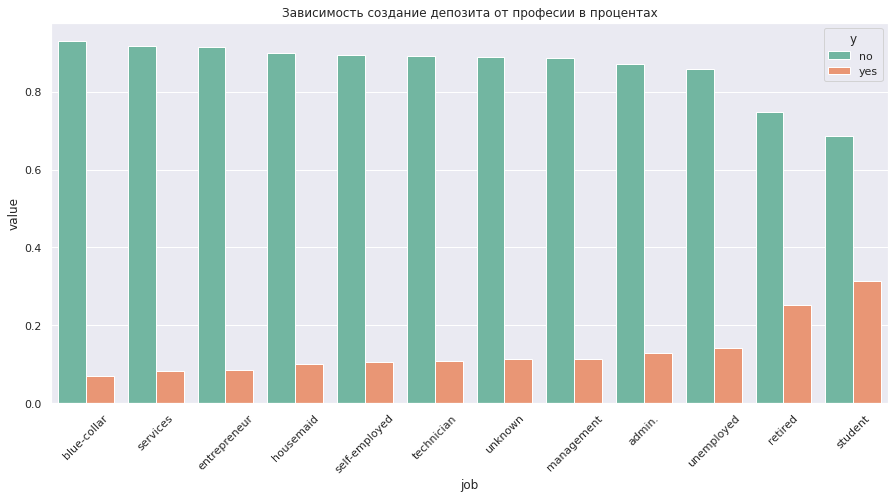

In [985]:
stacked = ct_jy_j.stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)
sns.set(rc={'figure.figsize':(15,7)})

chart = sns.barplot(
    x=stacked.job,
    y=stacked.value,
    hue=stacked.y, 
    palette='Set2',
   )


chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Зависимость создание депозита от професии в процентах")
plt.show()




**Наблюдение**

Тогда как все профессии показали примерно одни и те же результаты, выделяются две группы - student и retired. Retired в основном состоит из людей поколения Silent, которые показали самый большой процент создания депозита послле контакта с банком, как мы увидим дальше по исследованию. Интересна профессия студент. Так как видно, что они открывают депозит в три раза чаще. Предпологаю, что дело в том, что у студентов еще нет своего депозита в других банках и они охотней говотовы начать копить сбережения. 

In [986]:
ct_jy_w = pd.crosstab(df['y'], df['job'])
ct_jy_wjs = ct_jy_w.style.background_gradient(cmap=cm, axis = 1)
ct_jy_wjs

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,9070,8616,1332,954,2596,1286,1272,3646,600,6013,870,293
yes,1352,638,124,106,328,434,149,323,275,730,144,37


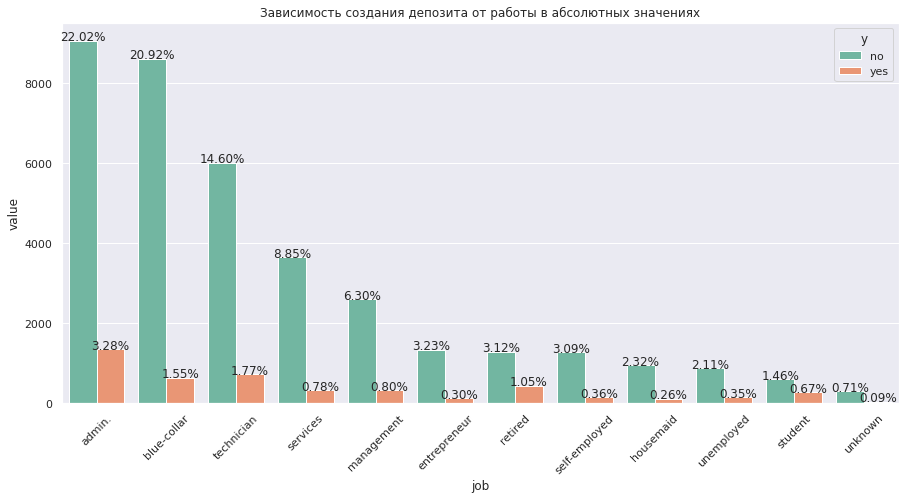

In [987]:
stacked = ct_jy_w.stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)

sns.set(rc={'figure.figsize':(15,7)})

chart = sns.barplot(
    x=stacked.job,
    y=stacked.value,
    hue=stacked.y, 
    palette='Set2'
)

perc_for_chart(chart)

 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Зависимость создания депозита от работы в абсолютных значениях")
plt.show()

**Наблюдение**

Как видим из графика функции, большинство созданных депозитов приходится на работающих в сфере admin, и как не странно, потом идут разнорабочии

Построим crosstable для поколений и работ

In [988]:
ct_jy_g = pd.crosstab([df['y'] , df['Generation']], df['job'] , normalize='columns')

In [989]:
ct_jy_s = ct_jy_g.style.background_gradient(cmap=cm)
ct_jy_s

_Не понял, как оформить индексы, чтобы было более очевидно где "да" и "нет"_

**Наблюдение**

Удивительной большой процент отказывающихся открыть вклад по всем профессиям приходиться на поколение X. И затрагивает поколение BabyBoomer`ов. Но у этих двух поколений и так самый большой процент отказов, что показало нам исследования поколений. 

Интересно то, что значительно меньше отказов в поколении X у ретейлоров. Думаю, они лучше всего обученны правильно распоряжаться своими финансами. Хотя могут быть и другие причины.

Так же интересно, что у студентов милиниалов самый большой отказ от открытия депозита, и самое большой процент согласия на открытие. Но думаю, это связано с тем, что ими активно интересуются все банки, для открытия депозита, и предпологаю большую конкуренцию. Но может быть дело в том, что их совсем мало в выборке и поэтому точных выводов я бы не делал. 

In [990]:
ct_jy_g_w = pd.crosstab( [ df['y'] , df['Generation']], df['job'])

In [991]:
fig = px.treemap(ct_jy_g_w.stack().reset_index().rename(columns={0:'value'})\
                 .sort_values(by="value", ascending=False), path=['Generation', 'job', 'y'], values='value', title = "Treemap по поколениям, работе и отношению к депозиту")
fig.show()

In [992]:
def chi_squred(table):
    stat, p, dof, expected = chi2_contingency(table)
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

**Гипотеза**

Зависит ли, откроет человек депозит или нет, от работы 

Проведем $\chi^2$ для проверки гипотезы


In [993]:
ct_jy_chi =  pd.crosstab(df['y'], df['job'])

In [994]:
chi_squred(ct_jy_chi)

stat=961.242, p=0.000
Probably dependent


С большой долей уверености наша гипотеза подтвердилась и эти переменные являются зависимыми

# Marital

Категориальная фич. Состоит ли человек в браке или нет.  (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

In [995]:
ct_jy_m = pd.crosstab(df['y'], df['marital'] , normalize='columns')
ct_jy_ms = ct_jy_m.style.background_gradient(cmap=cm, axis = 1)
ct_jy_ms

marital,divorced,married,single,unknown
y,,,,
no,0.896791,0.898427,0.859959,0.850000
yes,0.103209,0.101573,0.140041,0.150000


**Гипотеза**

Интересно, что если человек состоял или до сих пор состоит в браке, то он скорее откажется от открытия депозита, чем если нет.

Проверим гипотезу посчитав $\chi^2$

In [996]:
ct_jy_ma = pd.crosstab(df['y'], df['marital'], margins = True)
ct_jy_mas = ct_jy_ma.style.background_gradient(cmap=cm, axis = 1)
ct_jy_mas

marital,divorced,married,single,unknown,All
y,,,,,
no,4136,22396,9948,68,36548
yes,476,2532,1620,12,4640
All,4612,24928,11568,80,41188


In [997]:
ct_jy_a = pd.crosstab(df['y'], df['marital'])

In [998]:
chi_squred(ct_jy_a)

stat=122.655, p=0.000
Probably dependent


**Вывод** 

Как мы видим, наша гипотеза подтвердилась и это зависимые переменные

# Education

1731 - столько человек отказались рассказывать данные о своем образовании. 

(categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

In [999]:
cm = sns.light_palette("green", as_cmap=True)

In [1000]:
def cross(table, normalize ='columns', margins=False):
        crosstable = pd.crosstab(table[0], table[1] , normalize=normalize, margins=margins)
        styletable = crosstable.style.background_gradient(cmap=cm, axis = 1)
        return [styletable, crosstable]

_Поздно догадался эту функцию написать, но лучше поздно чем никогда_

In [1001]:
cross_ye_n = cross([df['y'], df['education']] , normalize='columns')
cross_ye_n[0]

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,0.897510,0.917976,0.921754,0.891645,0.777778,0.886515,0.862755,0.854997
yes,0.102490,0.082024,0.078246,0.108355,0.222222,0.113485,0.137245,0.145003


illiterate -  Having little or no formal education.

В 21 веке в португалии вериться с трудом. Интересно будет посмотреть на абсолютные значения

**Наблюдение**

Как мы видим, люди с образованием в 6 или 9 лет, не очень расположены к созданию депозитов. В то время как люди с университетским образованием и прошедшие профессиональный курсы делают их активнее.

Странно выглядит то, что люди с 4 годами образования делают депозиты на равне с теми кто закончил high school.

In [1002]:
cross_eg = cross([[df['y'], df['Generation']], df['education']], normalize=False)
cross_eg[0]

In [1003]:
cross_eg_n = cross([[df['y'], df['Generation']], df['education']], normalize='columns')
cross_eg_n[0]

**Наблюдение**

Тут я хочу больше внимая уделить тем, кто получил только 4 класса образования. И мы видим ,что их больше всего среди БабиБумеров, 2323 человека всупали в контакт с банком, и их мнение по поводу открытия депозита разделилось 50% на 50%. В то время как теже БейбиБумеры с образованием в 6, 9 лет и закончившие high school, очень неохотно открывают депозит. 

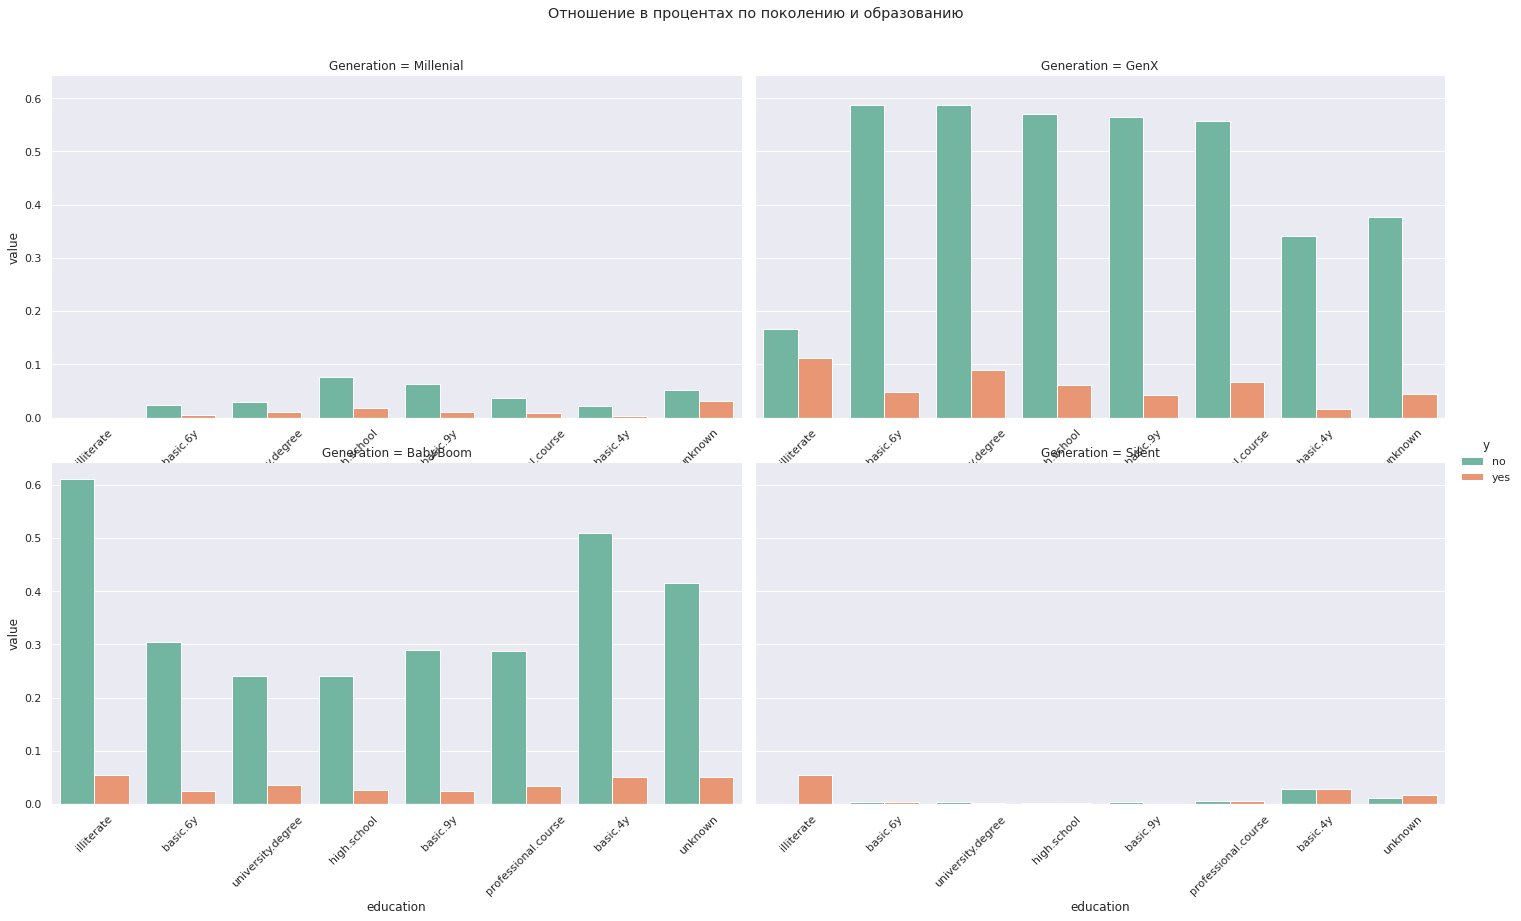

In [1004]:
stacked = cross_eg_n[1].stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)

 
chart = sns.catplot(x='education', y='value',

                hue='y', col="Generation",
                data=stacked, kind="bar",          
                col_wrap = 2,
                height=6, aspect=1.7,
                sharex = False,
                palette='Set2');

for ax in chart.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        


plt.subplots_adjust(top=0.9)
chart.fig.suptitle('Отношение в процентах по поколению и образованию')

plt.show()

_Не нашел способа, как в разделить графики, чтобы показать все х лейблы_

**Наблюдение**

Интересна большая разница между образованием поколения X  и БейбиБумеров. У Бейби бумеров гораздо меньше образования в 9 и 6 лет, а так же университетских стапеней и тех кто закончил high school

In [1005]:
cross_ej = cross([df['y'], df['education']], normalize=False)
cross_ej[0]

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
y,,,,,,,,
no,3748,2104,5572,8484,14,4648,10498,1480
yes,428,188,473,1031,4,595,1670,251


In [1006]:
cross_j_e = cross([df['job'], df['education']], normalize=False)
cross_j_e[0]

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


Blue-collar worker
A blue-collar worker is a working class person who performs manual labor. Blue-collar work may involve skilled or unskilled labor. From Wikipedia

**Наблюдение**

Всего было 18 обращений от людей, которые не имеют никакого образования и работают как чернорабочие. И 4 из них сделали депозит



Нам нужно тут применить точный тест Фишера, так как тут есть ячейки с количество наблюдений меньше 5. Но к сожалению, я не нашел в питоне библиотеки, которая его делает для таблицы больше чем 2x2, поэтому считаю, что нужно отбросить колонку illiterate, так как в ней очень мало значений и она не показательна. 

Еще интересно то, что 

**Гипотеза**

Уровень образования и работа это зависимые переменные 

In [1007]:
chi_squred(cross_j_e[1].drop('illiterate', axis = 1))

stat=37303.733, p=0.000
Probably dependent


Наша гипотеза подтвердилась, и с большой долей уверенности мы можем сказать, что это зависимыем переменные 

**Гипотеза** 

Уровень образования и создание депозита зависят друг от друга

Проведем $\chi^2$ тест 

In [1008]:
chi_squred(cross_ej[1])

stat=193.106, p=0.000
Probably dependent


Гипотеза подтвердилась, переменные уровень образования и создание депозита - зависимые переменные 

In [1009]:
fig = px.funnel(cross_ye_n[1].stack().reset_index(), x=0, y='education', color='y', title = "Процентное отношение открытия депозита и образования")
fig.show()

Как мы уже проверили ранее, эти переменные зависимые, и мы можем сказать, что в процентном отношении, больше всего открывают депозиты люди с высшим образованием, или те, кто посчитал правильным не раскрывать свои данные об образовании. Тех кто не указал образование всего около 1731 человек в выборке .

# Default

has credit in default? (categorical: "no","yes","unknown")

In [1010]:
cross_yd_n = cross([df['y'], df['default']] , normalize='columns')
cross_yd_n[0]

default,no,unknown,yes
y,,,
no,0.871210,0.948470,1.000000
yes,0.128790,0.051530,0.000000


In [1011]:
cross_yd = cross([df['y'], df['default']] , normalize=False)
cross_yd[0]

default,no,unknown,yes
y,,,
no,28391,8154,3
yes,4197,443,0


**Наблюдение** 

Люди с большой неохотой расказывают, если у них кредиты. И у большинства кредитов нет

In [1012]:
oddsratio, pvalue = stats.fisher_exact(cross_yd[1].drop('yes', axis = 1))

In [1013]:
oddsratio, pvalue

(0.36751472094045706, 4.445019335273607e-105)

Точный тест Фишера показал, что у нас есть основания отклонить гипотезу о том, что это независимые переменные. 

# housing

has housing loan? (categorical: "no","yes","unknown")

In [1014]:
cross_yh_n = cross([df['y'], df['default']] , normalize='columns')
cross_yh_n[0]

default,no,unknown,yes
y,,,
no,0.871210,0.948470,1.000000
yes,0.128790,0.051530,0.000000


In [1015]:
cross_yh = cross([df['y'], df['default']] , normalize=False)
cross_yh[0]

default,no,unknown,yes
y,,,
no,28391,8154,3
yes,4197,443,0


In [1016]:
oddsratio, pvalue = stats.fisher_exact(cross_yd[1].drop('yes', axis = 1))

In [1017]:
oddsratio, pvalue

(0.36751472094045706, 4.445019335273607e-105)

Точный тест Фишера показал, что у нас есть основания отклонить гипотезу о том, что это независимые переменные. 

# Loan

has personal loan? (categorical: "no","yes","unknown")

In [1018]:
cross_yl_n = cross([df['y'], df['default']] , normalize='columns')
cross_yl_n[0]

default,no,unknown,yes
y,,,
no,0.871210,0.948470,1.000000
yes,0.128790,0.051530,0.000000


In [1019]:
cross_yl = cross([df['y'], df['default']] , normalize=False)
cross_yl[0]

default,no,unknown,yes
y,,,
no,28391,8154,3
yes,4197,443,0


In [1020]:
oddsratio, pvalue = stats.fisher_exact(cross_yl[1].drop('yes', axis = 1))

In [1021]:
oddsratio, pvalue

(0.36751472094045706, 4.445019335273607e-105)

Точный тест Фишера показал, что у нас есть основания отклонить гипотезу о том, что это независимые переменные. 

**Вывод**

по всем этим трем переменным, о долговых обязательствах, мы можем заключить, что люди с большой неохотой рассказыют что у них они есть, но с говорят "нет", когда у них таких обязательств нет. 

Тем неменее все эти переменные являются зависимыми для нашей целовой переменной.

# Сводная таблица результатов теста $\chi^2$

In [1022]:
columns = ['y', "Generation", "job", "marital", "education", "default", 'housing']

In [1023]:
def crosstable_all(df, columns):
    
    def cr(table):
        return pd.crosstab(table[0], table[1])
    
    def chi_sq(table):
        stat, p, dof, expected = chi2_contingency(table)
        if p > 0.05:
            return 'PI'
        elif p == 0:
            return 'PD'
        else: 
            return 'PD'
        
    data = pd.DataFrame(index=columns, columns=columns)
    for i in columns:
        for r in columns:
            if i == r:
                data[i][r] = 'None'
            else:
                data[i][r] = chi_sq(cr([df[i].values, df[r].values]))
            
    return data

In [1024]:
crosstable_all(df, columns)

,y,Generation,job,marital,education,default,housing
y,None,PD,PD,PD,PD,PD,PI
Generation,PD,None,PD,PD,PD,PD,PI
job,PD,PD,None,PD,PD,PD,PI
marital,PD,PD,PD,None,PD,PD,PD
education,PD,PD,PD,PD,None,PD,PD
default,PD,PD,PD,PD,PD,None,PD
housing,PI,PI,PI,PD,PD,PD,None


_PI - Probably independed; PD - probably depended

**Вывод**

Как видим из таблицы, что целевая переменная является зависимой от всех фич, кроме housing. Но мы знаем, что в случае housing лучше опираться на точный тест фишера, так как там есть значения меньше 5. А точный тест Фишера показал, что целевая переменая зависит от housing.

#  Features related with the last contact of the current campaign:
   
       Информация, связанная с последним контактом в рекламной компании.
   
    8. contact: contact communication type (categorical: "cellular","telephone") 
    9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Я опущу фичу duration, по причинам описанным выше. (Если хватит времени то я к этому вернусь)

# Contact

contact communication type (categorical: "cellular","telephone")

In [1025]:
cross_yc_n = cross([df['y'], df['contact']] , normalize='columns')
cross_yc_n[0]

contact,cellular,telephone
y,,
no,0.852624,0.947687
yes,0.147376,0.052313


**Наблюдение**

Разительно отличается процент тех, кто оветил по стационарному телефону, от тех кто говорил по мобильному. 

Проведем точный тест фишера для таблицы 2x2

In [1026]:
oddsratio, pvalue = stats.fisher_exact(cross([df['y'], df['contact']], normalize=False)[1])

In [1027]:
oddsratio, pvalue

(0.31935750422324993, 1.8383355624682066e-210)

Точный тест Фишера показал, что у нас есть основания отклонить гипотезу о том, что это независимые переменные. 

**Вывод**

Мы можем утверждать, что эти переменные зависимые, и количество согласивших на депозит, которые говорили по стационарному телефону, больше. 

In [1028]:
cross( [ [df['contact'] ] , [df['y'], df['Generation']]] , normalize = False)[0]

In [1029]:
crt_1_s = cross( [  [df['y'], df['job']], [df['contact'] ]] , normalize = False)
crt_1_s[0]

**Наблюдение**

Тут интересно то, что тех кто не указывал свою работу, и звонил со стационарного телефона получили больше отказов, что выбивается из общий тенденции. 

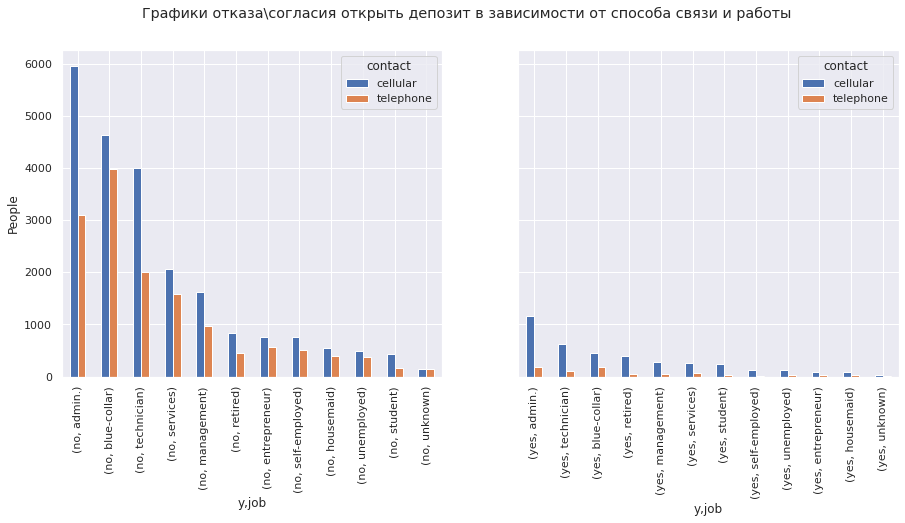

In [1030]:
fig, axs = plt.subplots(1, 2, sharey='row', figsize = (15, 6))

crt_1_s[1].sort_values('cellular', ascending=False).loc[['yes']].plot(kind='bar', ax=axs[1])
crt_1_s[1].sort_values('cellular', ascending=False).loc[['no']].plot(kind='bar', ax=axs[0])
axs[0].set_ylabel('People')
fig.suptitle('Графики отказа\согласия открыть депозит в зависимости от способа связи и работы') 
plt.show() 

# Month

last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

In [1031]:
cross_ym_n = cross([df['y'], df['month']] , normalize=False)
cross_ym_n[0]

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,2093,5523,93,6525,4759,270,12883,3685,403,314
yes,539,655,89,649,559,276,886,416,315,256


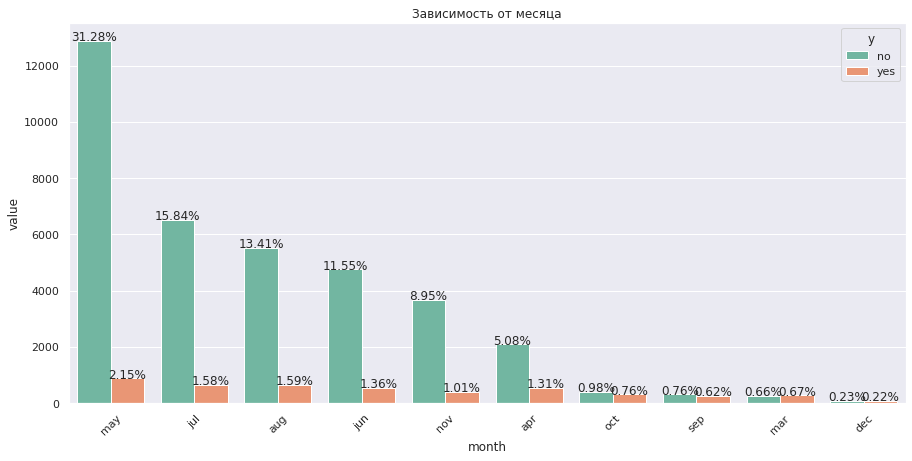

In [1032]:
stacked = cross_ym_n[1].stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)
sns.set(rc={'figure.figsize':(15,7)})
chart = sns.barplot(
    x=stacked.month,
    y=stacked.value,
    hue=stacked.y, 
    palette='Set2'
)

perc_for_chart(chart)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Зависимость от месяца")
plt.show()

Очень интересное наблюдение. Думаю перед тем как поехать отдыхать в отпуск, людей обзванивали чаще. Но тем не менее количество согласившихся сделать депозит, остается почти неизменным.

In [1033]:
cross_ym = cross([df['y'], df['month']] , normalize='columns')
cross_ym[0]

month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
y,,,,,,,,,,
no,0.795213,0.893979,0.510989,0.909534,0.894885,0.494505,0.935653,0.898561,0.561281,0.550877
yes,0.204787,0.106021,0.489011,0.090466,0.105115,0.505495,0.064347,0.101439,0.438719,0.449123


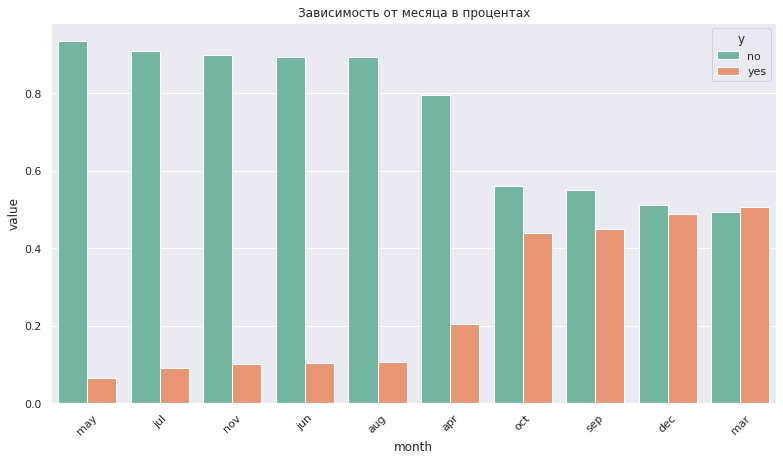

In [1034]:
stacked = cross_ym[1].stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)
sns.set(rc={'figure.figsize':(13,7)})
chart = sns.barplot(
    x=stacked.month,
    y=stacked.value,
    hue=stacked.y, 
    palette='Set2'
)



chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Зависимость от месяца в процентах")
plt.show()

С чем связана такая динамика, я не знаю. 

#TODO посмотреть, с чем это может быть связано 

Проведем $\chi^2$ тест 

In [1035]:
chi_squred(cross_ym_n[1])

stat=3101.149, p=0.000
Probably dependent


Как мы видим, по результам теста, целевая переменая вероятно зависима от месяца, в котором был совершен звонок. С большой степенью увереностью.

# Day of week

day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

In [1036]:
cross_yd_n = cross([df['y'], df['day_of_week']] , normalize=False)
cross_yd_n[0]

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,6981,7667,7578,7137,7185
yes,846,847,1045,953,949


**Наблюдение**

Как мы видим, звонки совершались только в будние дни. 

In [1037]:
cross_yd = cross([df['y'], df['day_of_week']] , normalize='columns')
cross_yd[0]

day_of_week,fri,mon,thu,tue,wed
y,,,,,
no,0.891913,0.900517,0.878812,0.882200,0.883329
yes,0.108087,0.099483,0.121188,0.117800,0.116671


Видим что разброс составляет ~ 2%. Люди неохотнее всего соглащаются на депозит по понедельникам, и охотненее всего по вторникам. Но я пока не знаю, было ли это первое касание. 

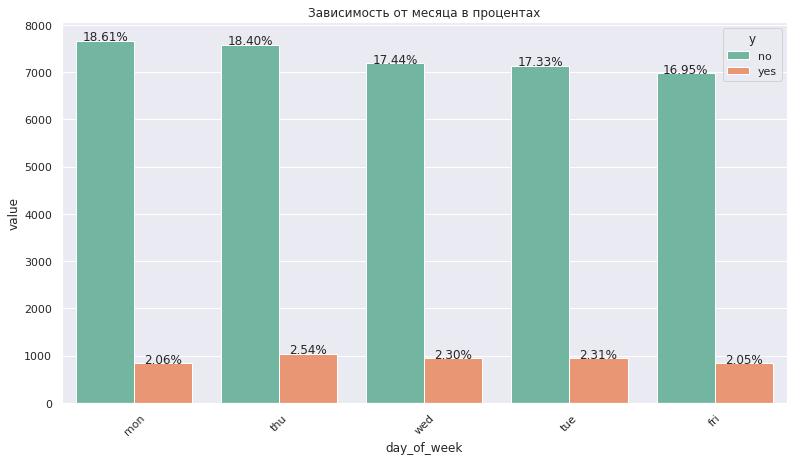

In [1038]:
stacked = cross_yd_n[1].stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)
sns.set(rc={'figure.figsize':(13,7)})
chart = sns.barplot(
    x=stacked.day_of_week,
    y=stacked.value,
    hue=stacked.y, 
    palette='Set2'
)

perc_for_chart(chart)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Зависимость от месяца в процентах")
plt.show()

Проведем $\chi^2$ тест, посмотреть, зависит ли целевая переменная от дня недели

In [1039]:
chi_squred(cross_yd_n[1])

stat=26.145, p=0.000
Probably dependent


Видим, что с большой долей уверенности целевая переменная зависит от дня недели. 

# Duration

duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [1040]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

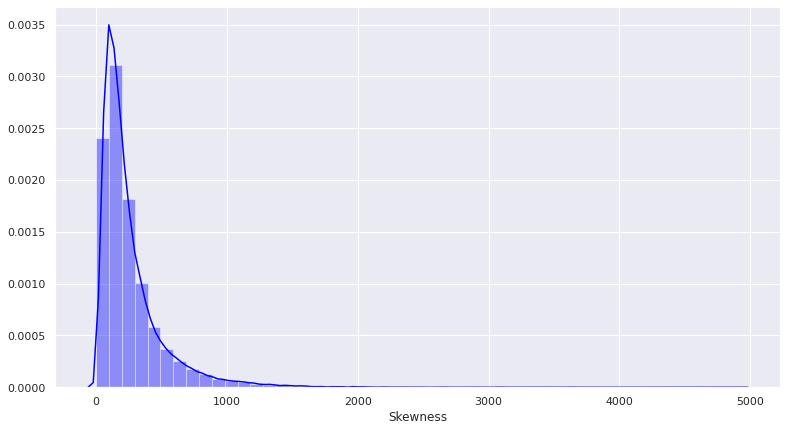

In [1041]:
sns.distplot(df['duration'],color='blue',axlabel ='Skewness')
plt.show()

In [1042]:
stats.pointbiserialr(df['duration'],label_encoder.fit_transform(df['y']))

PointbiserialrResult(correlation=0.40527380067931484, pvalue=0.0)

In [1043]:
duration_yj , lmbda = stats.yeojohnson(df['duration'])

In [1044]:
df['duration_yj'] = duration_yj

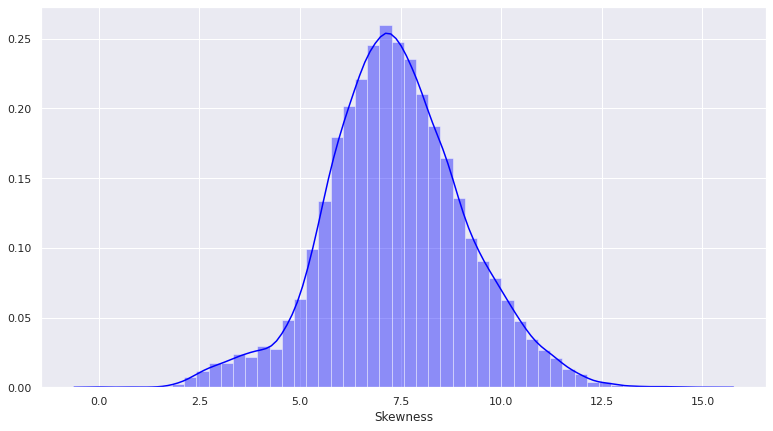

In [1045]:
sns.distplot(df['duration_yj'],color='blue',axlabel ='Skewness')
plt.show()

In [1046]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [1047]:
stats.pointbiserialr(df['duration_yj'],label_encoder.fit_transform(df['y']))

PointbiserialrResult(correlation=0.3694854853271899, pvalue=0.0)

# Other attributes
   
       Информация о самой компании
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

## campaign

Сколько звонков было совершено клиенты в течении компании

In [1048]:
len(df['campaign'].unique())

42

Видим, что эту фичу интересней было бы посмотреть как категориальную разбитую по интервалом. Удивительно, что число контактов доходило до 43.

Функция для разбиения на интервалы

In [1049]:
def date_range(table, intv):
    start = 0
    end = table.max()
    diff = (end  - start ) / intv
    for i in range(intv):
        yield round((start + diff * i))
    yield round(end)

In [1050]:
bins = list(date_range(df['campaign'], 8))[:-1]
bins

[0, 7, 14, 21, 28, 35, 42, 49]

In [1051]:
df['camp_int'] = pd.cut(df['campaign'], bins = bins, right = True, labels=['0-8', '9-15', '16-22', '23-28', '29-35', '36-42', '43-49'])

In [1052]:
df['camp_int'].dtype

CategoricalDtype(categories=['0-8', '9-15', '16-22', '23-28', '29-35', '36-42', '43-49'], ordered=True)

Получили категориальную фичу. Посмотрим на таблицу 

In [1053]:
cross_yci = cross([df['y'], df['camp_int']] , normalize=False)
cross_yci[0]

camp_int,0-8,9-15,16-22,23-28,29-35,36-42,43-49
y,,,,,,,
no,34844,1305,267,82,40,7,2
yes,4567,66,6,1,0,0,0


Как видим, в большинстве звонили до 8 раз. И два раза позвонили от 43 до 49 раз.

Проведем тест, является ли новуя фичу полезной

In [1054]:
chi_squred(cross_yci[1])

stat=98.267, p=0.000
Probably dependent


Рассмотрим ориганальную фичу

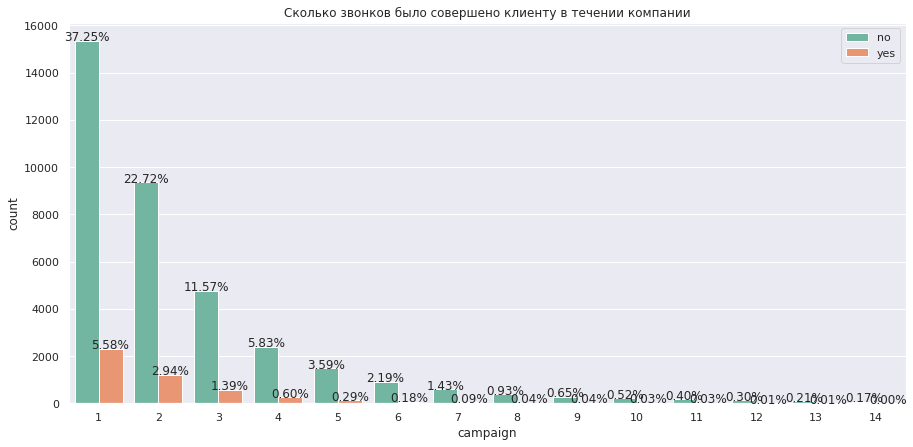

In [1055]:

sns.set(rc={'figure.figsize':(15,7)})
chart = sns.countplot( df['campaign'][(df['camp_int']== '0-8') | (df['camp_int']== '9-15')],  hue = df['y'][(df['camp_int']== '0-8') | (df['camp_int']== '9-15')], palette='Set2')
perc_for_chart(chart)
plt.title('Сколько звонков было совершено клиенту в течении компании')
plt.legend()
plt.show()

Как видим, после 5 звонка люди уже переставали соглашаться, но тем неменее отдельные выбросы были. 

## pdays

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

In [1056]:
df['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

Как видим, тут тоже стоит разбить на интервалы, уникальных значений не много, но точностью можно немного пожертвовать.

**Примечание**

Примечание 999 значит клиент не был привлечен в прошлых компаниях 

In [1057]:
bins = list(date_range(df['pdays'][df['pdays'] != 999], 7))[:-1]
bins.append(999)

In [1058]:
bins

[0, 4, 8, 12, 15, 19, 23, 999]

In [1059]:
df['pdays_int'] = pd.cut(df['pdays'], bins = bins, right = True, labels=['0-4', '5-8', '9-12', '13-15', '16-19', '22-23', '999'])

In [1060]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Generation,duration_yj,camp_int,pdays_int
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.048817,0-8,999
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,BabyBoom,6.967713,0-8,999
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,GenX,7.763607,0-8,999
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,GenX,6.992524,0-8,999
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.376747,0-8,999


Проведем тест, является ли новуя фичу полезной

In [1061]:
cross_ypi = cross([df['y'], df['pdays_int']] , normalize=False)
cross_ypi[0]

pdays_int,0-4,5-8,9-12,13-15,16-19,22-23,999
y,,,,,,,
no,238,166,96,25,16,2,36000
yes,406,370,106,55,13,4,3676


**Вывод**

Видим, что большинство людей, были холодными, то есть с ними не было контакта до провидения компаний. Но мы так же наблюдаем, что по теплым звонкам были очень хорошие показатели согласия людей на отрытие депозита. Посмотрим в процентах 

Проведем тест, на полезность нашей фичи

In [1062]:
chi_squred(cross_ypi[1])

stat=4340.649, p=0.000
Probably dependent


Целевая переменная с большой долей уверености является зависимой от новой переменной 

Построим график для оригинальной переменной 

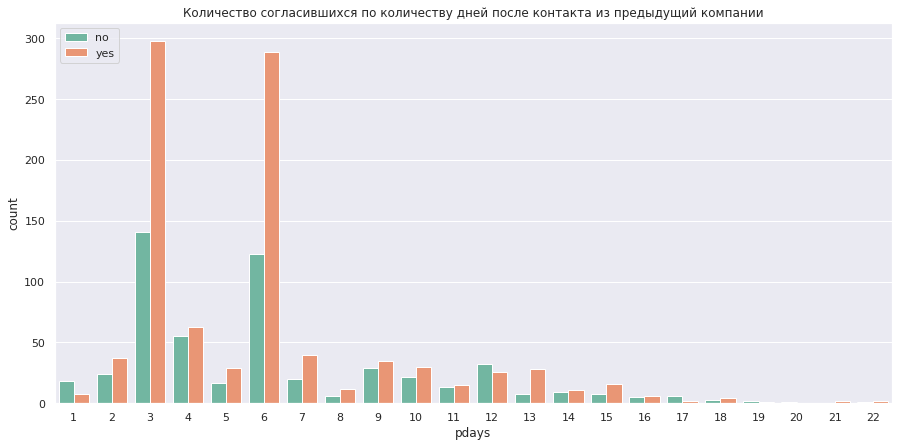

In [1063]:
chart = sns.countplot( df['pdays'][df['pdays_int'] != '999'] , hue=df['y'], palette='Set2')

plt.title('Количество согласившихся по количеству дней после контакта из предыдущий компании')
plt.legend()
plt.show()

График людей, с которыми была связи в предыидущих компаниях 

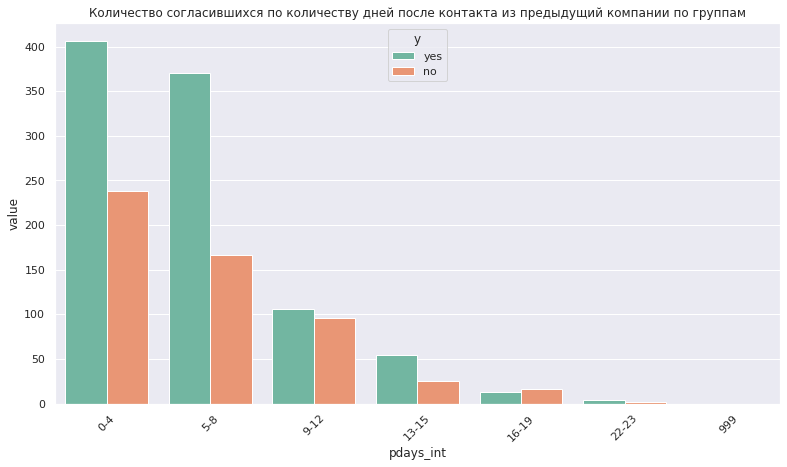

In [1064]:
stacked = cross_ypi[1].stack().reset_index().rename(columns={0:'value'}).sort_values(by="value",  ascending=False)
stacked = stacked[stacked['pdays_int'] != '999']
sns.set(rc={'figure.figsize':(13,7)}),
chart = sns.barplot(
    x=stacked['pdays_int'],
    y=stacked['value'],
    hue=stacked.y, 
    palette='Set2'
)
 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.title("Количество согласившихся по количеству дней после контакта из предыдущий компании по группам")
plt.show()

Мы видим большой шанс того, что люди из предыдущий компаний соглашались открыть 

# Previous

number of contacts performed before this campaign and for this client (numeric)

In [1065]:
df['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [1066]:
df['previous'] = df['previous'].astype('category')

В этой фиче всего 8 значений. Ее можно рассматривать как категориальную 

posx and posy should be finite values
posx and posy should be finite values


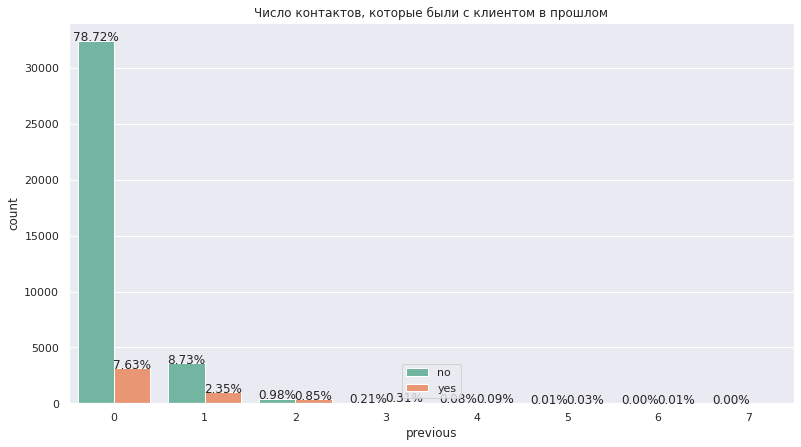

In [1067]:
chart = sns.countplot( df['previous'], hue=df['y'], palette='Set2')
perc_for_chart(chart)
plt.title('Число контактов, которые были с клиентом в прошлом')
plt.legend()
plt.show()

Как видим, с большинством людей в предыдущих компаниях не связывали.

Проведем тест $\chi^2$ , так как я рассматриваю эту фичу как категориальную 

In [1068]:
cross_ypr = cross([df['y'], df['previous']] , normalize=False)
cross_ypr[0]

previous,0,1,2,3,4,5,6,7
y,,,,,,,,
no,32422,3594,404,88,32,5,2,1
yes,3141,967,350,128,38,13,3,0


In [1069]:
chi_squred(cross_ypr[1])

stat=2299.436, p=0.000
Probably dependent


Как видим, с большой долей вероятности, целевая переменная зависима от этой. 

# poutcome

outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

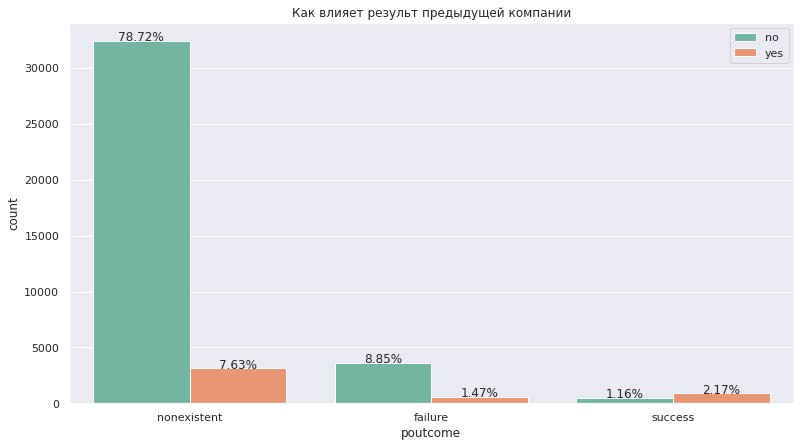

In [1070]:
chart = sns.countplot( df['poutcome'], hue=df['y'], palette='Set2')
perc_for_chart(chart)
plt.title('Как влияет результ предыдущей компании')
plt.legend();

**Вывод**

Не совсем ясно что значит success. Я могу предположить, что люди, которые участвовали в предыдущей рекламной компании и или согласиились открыть депозит, или открыли депозит, согласились открыть его еще раз.

Проведем тест $\chi^2$ 

In [1071]:
cross_ypo = cross([df['y'], df['poutcome']] , normalize=False)
cross_ypo[0]

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


In [1072]:
chi_squred(cross_ypo[1])

stat=4230.524, p=0.000
Probably dependent


С большой долей уверености, мы можем сказать, что наша целевая переменная является зависимой от этой переменной. 

# social and economic context attributes
  
      Социальный и экономической контекст
  
    16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17. cons.price.idx: consumer price index - monthly indicator (numeric)     
    18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
    19. euribor3m: euribor 3 month rate - daily indicator (numeric)
    20. nr.employed: number of employees - quarterly indicator (numeric)

# emp.var.rate

employment variation rate - quarterly indicator (numeric)

Employment rates indicate the percentage of persons of working age who are employed. In the short term, these rates are sensitive to economic cycles, but in the longer term they are also affected by government policies that pertain to higher education, income support and measures that facilitate employment of women.

То есть это переменная - Колебания показателей занятости

#TODO  просмотреть про показатель более внимательно 

In [1073]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

In [1074]:
len(df['emp.var.rate'].unique())

10

Как видим, тут всего 10 уникальных значений, и я могу рассматривать эту переменную, как категориальную 

In [1075]:
df['emp.var.rate'] = df['emp.var.rate'].astype('category')

Проведем стандартные тесты для категориальной переменной 

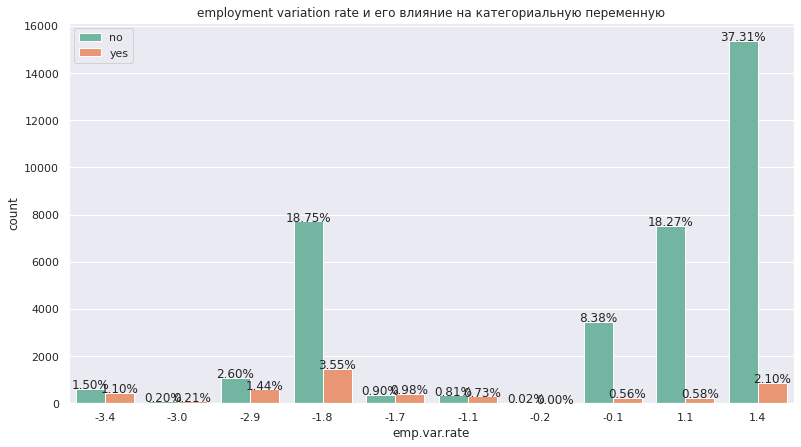

In [1076]:
chart = sns.countplot( df['emp.var.rate'], hue=df['y'], palette='Set2')
perc_for_chart(chart)
plt.title('employment variation rate и его влияние на категориальную переменную')
plt.legend();

К сожалению я не могу придти к каким то однозначным выводам по этой переменной 

In [1077]:
cross_yer = cross([df['y'], df['emp.var.rate']] , normalize=False)
cross_yer[0]

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,617,84,1069,7723,370,334,9,3451,7523,15368
yes,454,88,594,1461,403,301,1,232,240,866


In [1078]:
cross_yer_n = cross([df['y'], df['emp.var.rate']] , normalize=False)
cross_yer_n[0]

emp.var.rate,-3.4,-3.0,-2.9,-1.8,-1.7,-1.1,-0.2,-0.1,1.1,1.4
y,,,,,,,,,,
no,617,84,1069,7723,370,334,9,3451,7523,15368
yes,454,88,594,1461,403,301,1,232,240,866


In [1079]:
chi_squred(cross_yer[1])

stat=5806.707, p=0.000
Probably dependent


Как видим, целевая переменная является зависимой от этой переменной 

# cons.price.idx

consumer price index - monthly indicator (numeric) 

In [1080]:
df['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

In [1081]:
len(df['cons.price.idx'].unique())

26

В этой переменной всего 26 категорий

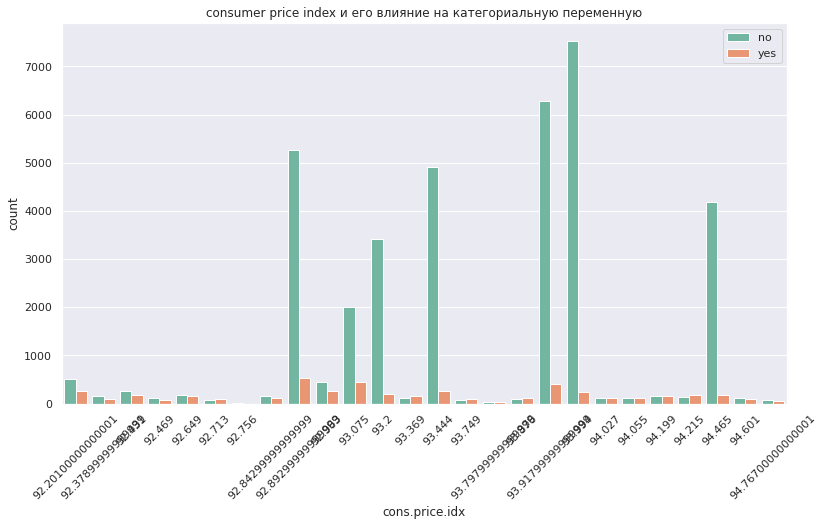

In [1082]:
chart = sns.countplot(df['cons.price.idx'], hue=df['y'], palette='Set2')
 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('consumer price index и его влияние на категориальную переменную')
plt.legend();

In [1083]:
cross_ycpi = cross([df['y'], df['cons.price.idx']] , normalize=False)
cross_ycpi[0]

cons.price.idx,92.20100000000001,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,93.075,93.2,93.369,93.444,93.749,93.79799999999999,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,506,161,267,112,189,84,9,156,5270,451,2016,3426,114,4904,77,25,90,6278,7523,113,122,153,135,4186,111,70
yes,264,106,180,66,168,88,1,126,524,264,442,190,150,271,97,42,122,407,240,120,107,150,176,188,93,58


In [1084]:
cross_ycpi_n = cross([df['y'], df['cons.price.idx']] , normalize='columns')
cross_ycpi_n[0]

cons.price.idx,92.20100000000001,92.37899999999999,92.431,92.469,92.649,92.713,92.756,92.84299999999999,92.89299999999999,92.963,93.075,93.2,93.369,93.444,93.749,93.79799999999999,93.876,93.91799999999999,93.994,94.027,94.055,94.199,94.215,94.465,94.601,94.76700000000001
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.657143,0.602996,0.597315,0.629213,0.529412,0.488372,0.900000,0.553191,0.909562,0.630769,0.820179,0.947456,0.431818,0.947633,0.442529,0.373134,0.424528,0.939117,0.969084,0.484979,0.532751,0.504950,0.434084,0.957019,0.544118,0.546875
yes,0.342857,0.397004,0.402685,0.370787,0.470588,0.511628,0.100000,0.446809,0.090438,0.369231,0.179821,0.052544,0.568182,0.052367,0.557471,0.626866,0.575472,0.060883,0.030916,0.515021,0.467249,0.495050,0.565916,0.042981,0.455882,0.453125


In [1085]:
chi_squred(cross_yer[1])

stat=5806.707, p=0.000
Probably dependent


# cons.conf.idx

consumer confidence index - monthly indicator (numeric) 

In [1086]:
df['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

In [1087]:
len(df['cons.price.idx'].unique())

26

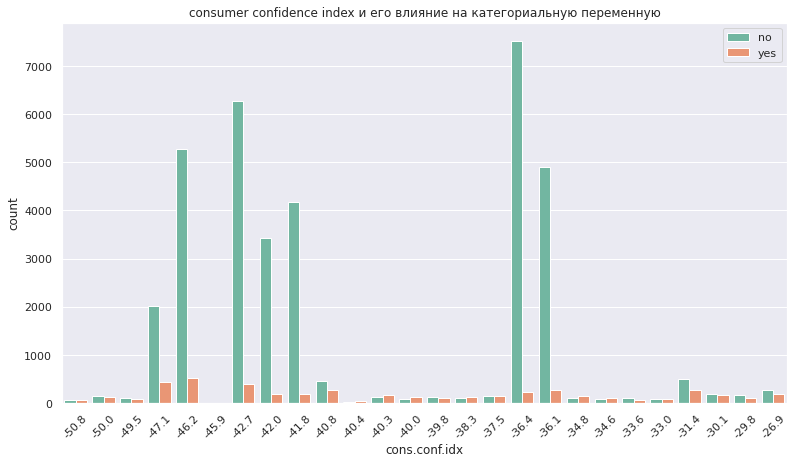

In [1088]:
chart = sns.countplot(df['cons.conf.idx'], hue=df['y'], palette='Set2')
 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('consumer confidence index и его влияние на категориальную переменную')
plt.legend();

In [1089]:
cross_ycci = cross([df['y'], df['cons.conf.idx']] , normalize=False)
cross_ycci[0]

cons.conf.idx,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,70,156,111,2016,5270,9,6278,3426,4186,451,25,135,90,122,113,153,7523,4904,114,77,112,84,506,189,161,267
yes,58,126,93,442,524,1,407,190,188,264,42,176,122,107,120,150,240,271,150,97,66,88,264,168,106,180


In [1090]:
cross_ycci_n = cross([df['y'], df['cons.conf.idx']] , normalize='columns')
cross_ycci_n[0]

cons.conf.idx,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.546875,0.553191,0.544118,0.820179,0.909562,0.900000,0.939117,0.947456,0.957019,0.630769,0.373134,0.434084,0.424528,0.532751,0.484979,0.504950,0.969084,0.947633,0.431818,0.442529,0.629213,0.488372,0.657143,0.529412,0.602996,0.597315
yes,0.453125,0.446809,0.455882,0.179821,0.090438,0.100000,0.060883,0.052544,0.042981,0.369231,0.626866,0.565916,0.575472,0.467249,0.515021,0.495050,0.030916,0.052367,0.568182,0.557471,0.370787,0.511628,0.342857,0.470588,0.397004,0.402685


In [1091]:
cross_ycci_nt = cross([df['y'], df['cons.conf.idx']] , normalize=True)
cross_ycci_nt[0]

cons.conf.idx,-50.8,-50.0,-49.5,-47.1,-46.2,-45.9,-42.7,-42.0,-41.8,-40.8,-40.4,-40.3,-40.0,-39.8,-38.3,-37.5,-36.4,-36.1,-34.8,-34.6,-33.6,-33.0,-31.4,-30.1,-29.8,-26.9
y,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.001700,0.003788,0.002695,0.048946,0.127950,0.000219,0.152423,0.083180,0.101632,0.010950,0.000607,0.003278,0.002185,0.002962,0.002744,0.003715,0.182650,0.119064,0.002768,0.001869,0.002719,0.002039,0.012285,0.004589,0.003909,0.006482
yes,0.001408,0.003059,0.002258,0.010731,0.012722,0.000024,0.009882,0.004613,0.004564,0.006410,0.001020,0.004273,0.002962,0.002598,0.002913,0.003642,0.005827,0.006580,0.003642,0.002355,0.001602,0.002137,0.006410,0.004079,0.002574,0.004370


In [1092]:
chi_squred(cross_ycci[1])

stat=7665.735, p=0.000
Probably dependent


# euribor3m

euribor 3 month rate - daily indicator (numeric)

In [1093]:
len(df['euribor3m'].unique())

316

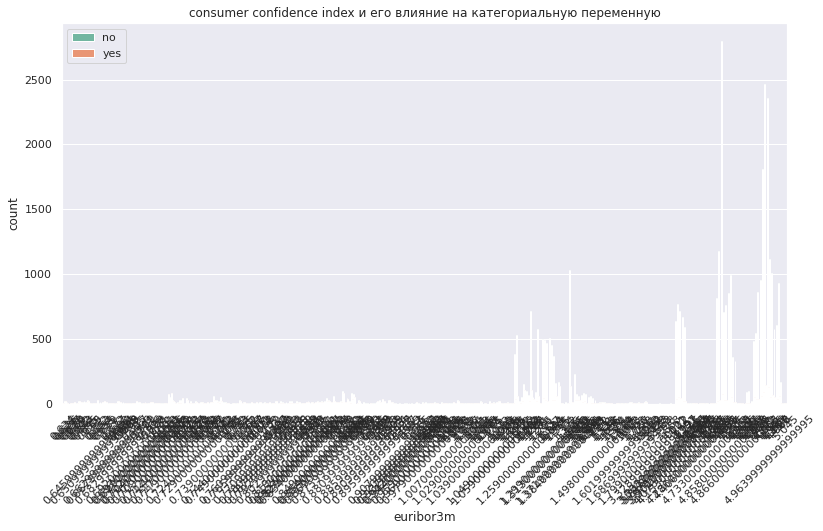

In [1094]:
chart = sns.countplot(df['euribor3m'], hue=df['y'], palette='Set2')
 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('consumer confidence index и его влияние на категориальную переменную')
plt.legend();

In [1095]:
cross_ye3 = cross([df['y'], df['euribor3m']] , normalize=False)
cross_ye3[0]

euribor3m,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.6459999999999999,0.649,0.65,0.6509999999999999,0.652,0.653,0.654,0.655,0.659,0.6629999999999999,0.6679999999999999,0.672,0.677,0.682,0.6829999999999999,0.684,0.685,0.688,0.69,0.6920000000000001,0.695,0.6970000000000001,0.6990000000000001,0.7,0.701,0.7020000000000001,0.7040000000000001,0.706,0.7070000000000001,0.708,0.7090000000000001,0.71,0.711,0.7120000000000001,0.713,0.7140000000000001,0.715,0.716,0.7170000000000001,0.718,0.7190000000000001,0.72,0.721,0.722,0.723,0.7240000000000001,0.727,0.728,0.7290000000000001,0.73,0.731,0.732,0.733,0.735,0.737,0.7390000000000001,0.74,0.741,0.742,0.743,0.7440000000000001,0.748,0.7490000000000001,0.75,0.752,0.753,0.754,0.755,0.7609999999999999,0.762,0.7659999999999999,0.767,0.768,0.77,0.7709999999999999,0.773,0.778,0.7809999999999999,0.782,0.7879999999999999,0.79,0.7929999999999999,0.797,0.802,0.8029999999999999,0.809,0.81,0.813,0.8190000000000001,0.821,0.8220000000000001,0.825,0.8270000000000001,0.8290000000000001,0.8340000000000001,0.835,0.838,0.84,0.843,0.846,0.8490000000000001,0.851,0.8540000000000001,0.8590000000000001,0.861,0.8690000000000001,0.87,0.873,0.8759999999999999,0.877,0.878,0.879,0.88,0.8809999999999999,0.882,0.883,0.884,0.885,0.8859999999999999,0.888,0.889,0.89,0.8909999999999999,0.893,0.894,0.895,0.8959999999999999,0.898,0.899,0.9,0.903,0.904,0.905,0.9079999999999999,0.914,0.9209999999999999,0.927,0.9329999999999999,0.937,0.9420000000000001,0.9440000000000001,0.953,0.956,0.9590000000000001,0.965,0.9690000000000001,0.972,0.977,0.9790000000000001,0.982,0.985,0.987,0.993,0.996,1.0,1.0070000000000001,1.008,1.016,1.018,1.025,1.028,1.0290000000000001,1.03,1.031,1.032,1.035,1.037,1.0390000000000001,1.04,1.041,1.043,1.044,1.045,1.046,1.047,1.048,1.0490000000000002,1.05,1.0590000000000002,1.072,1.085,1.099,1.206,1.215,1.224,1.235,1.244,1.25,1.252,1.2590000000000001,1.26,1.262,1.264,1.266,1.268,1.27,1.281,1.286,1.291,1.2990000000000002,1.3130000000000002,1.327,1.334,1.344,1.354,1.365,1.3719999999999999,1.3840000000000001,1.392,1.4,1.405,1.406,1.41,1.415,1.423,1.435,1.445,1.453,1.466,1.479,1.483,1.4980000000000002,1.51,1.52,1.531,1.538,1.548,1.556,1.56,1.574,1.584,1.6019999999999999,1.614,1.629,1.64,1.65,1.663,1.6869999999999998,1.703,1.726,1.757,1.778,1.7990000000000002,1.811,3.053,3.282,3.3289999999999997,3.428,3.488,3.563,3.6689999999999996,3.7430000000000003,3.8160000000000003,3.853,3.8789999999999996,3.9010000000000002,4.021,4.0760000000000005,4.12,4.1530000000000005,4.191,4.223,4.245,4.2860000000000005,4.343,4.406000000000001,4.474,4.592,4.663,4.7,4.7330000000000005,4.76,4.794,4.827,4.855,4.856,4.857,4.8580000000000005,4.859,4.86,4.864,4.865,4.8660000000000005,4.912,4.918,4.921,4.936,4.947,4.955,4.956,4.957,4.958,4.959,4.96,4.961,4.962,4.963,4.9639999999999995,4.965,4.966,4.967,4.968,4.97,5.0,5.045
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,2,21,11,1,2,5,5,18,12,14,15,26,4,8,4,8,6,7,10,5,7,9,9,5,19,3,6,4,0,1,5,3,4,14,4,8,13,2,7,15,2,4,5,3,6,7,66,50,32,11,13,27,31,2,45,4,18,2,19,5,10,12,4,5,8,12,56,32,22,49,10,12,7,1,5,4,5,27,1,11,1,2,7,9,7,5,12,3,12,8,7,4,6,21,2,22,14,9,3,17,17,7,21,12,6,9,6,19,7,13,7,19,15,19,20,42,32,1,62,15,8,21,96,9,43,18,86,78,1,25,5,11,8,4,7,3,2,16,26,15,7,4,28,5,11,3,1,2,0,2,7,2,2,1,6,4,1,10,16,3,9,2,13,3,1,10,1,2,6,2,4,6,27,4,3,7,2,2,6,3,5,3,21,1,6,1,17,7,13,13,17,3,8,7,16,5,4,385,527,19,49,150,95,65,716,55,89,574,9,503,495,468,505,450,369,158,167,7,8,15,9,1034,15,227,73,61,65,83,73,49,58,43,29,8,12,15,12,1,7,4,1,1,3,6,9,6,3,10,13,6,2,13,1,4,19,0,1,1,1,1,2,1,1,1,1,2,1,639,772,713,671,591,1,7,5,3,5,1,2,5,5,2,1,1,2,819,1178,2796,704,758,854,991,358,326,3,2,1,1,94,96,23,484,546,858,956,1812,2469,2361,1120,10

In [1096]:
cross_ye3_n = cross([df['y'], df['euribor3m']] , normalize=True)
cross_ye3_n[0]

euribor3m,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.6459999999999999,0.649,0.65,0.6509999999999999,0.652,0.653,0.654,0.655,0.659,0.6629999999999999,0.6679999999999999,0.672,0.677,0.682,0.6829999999999999,0.684,0.685,0.688,0.69,0.6920000000000001,0.695,0.6970000000000001,0.6990000000000001,0.7,0.701,0.7020000000000001,0.7040000000000001,0.706,0.7070000000000001,0.708,0.7090000000000001,0.71,0.711,0.7120000000000001,0.713,0.7140000000000001,0.715,0.716,0.7170000000000001,0.718,0.7190000000000001,0.72,0.721,0.722,0.723,0.7240000000000001,0.727,0.728,0.7290000000000001,0.73,0.731,0.732,0.733,0.735,0.737,0.7390000000000001,0.74,0.741,0.742,0.743,0.7440000000000001,0.748,0.7490000000000001,0.75,0.752,0.753,0.754,0.755,0.7609999999999999,0.762,0.7659999999999999,0.767,0.768,0.77,0.7709999999999999,0.773,0.778,0.7809999999999999,0.782,0.7879999999999999,0.79,0.7929999999999999,0.797,0.802,0.8029999999999999,0.809,0.81,0.813,0.8190000000000001,0.821,0.8220000000000001,0.825,0.8270000000000001,0.8290000000000001,0.8340000000000001,0.835,0.838,0.84,0.843,0.846,0.8490000000000001,0.851,0.8540000000000001,0.8590000000000001,0.861,0.8690000000000001,0.87,0.873,0.8759999999999999,0.877,0.878,0.879,0.88,0.8809999999999999,0.882,0.883,0.884,0.885,0.8859999999999999,0.888,0.889,0.89,0.8909999999999999,0.893,0.894,0.895,0.8959999999999999,0.898,0.899,0.9,0.903,0.904,0.905,0.9079999999999999,0.914,0.9209999999999999,0.927,0.9329999999999999,0.937,0.9420000000000001,0.9440000000000001,0.953,0.956,0.9590000000000001,0.965,0.9690000000000001,0.972,0.977,0.9790000000000001,0.982,0.985,0.987,0.993,0.996,1.0,1.0070000000000001,1.008,1.016,1.018,1.025,1.028,1.0290000000000001,1.03,1.031,1.032,1.035,1.037,1.0390000000000001,1.04,1.041,1.043,1.044,1.045,1.046,1.047,1.048,1.0490000000000002,1.05,1.0590000000000002,1.072,1.085,1.099,1.206,1.215,1.224,1.235,1.244,1.25,1.252,1.2590000000000001,1.26,1.262,1.264,1.266,1.268,1.27,1.281,1.286,1.291,1.2990000000000002,1.3130000000000002,1.327,1.334,1.344,1.354,1.365,1.3719999999999999,1.3840000000000001,1.392,1.4,1.405,1.406,1.41,1.415,1.423,1.435,1.445,1.453,1.466,1.479,1.483,1.4980000000000002,1.51,1.52,1.531,1.538,1.548,1.556,1.56,1.574,1.584,1.6019999999999999,1.614,1.629,1.64,1.65,1.663,1.6869999999999998,1.703,1.726,1.757,1.778,1.7990000000000002,1.811,3.053,3.282,3.3289999999999997,3.428,3.488,3.563,3.6689999999999996,3.7430000000000003,3.8160000000000003,3.853,3.8789999999999996,3.9010000000000002,4.021,4.0760000000000005,4.12,4.1530000000000005,4.191,4.223,4.245,4.2860000000000005,4.343,4.406000000000001,4.474,4.592,4.663,4.7,4.7330000000000005,4.76,4.794,4.827,4.855,4.856,4.857,4.8580000000000005,4.859,4.86,4.864,4.865,4.8660000000000005,4.912,4.918,4.921,4.936,4.947,4.955,4.956,4.957,4.958,4.959,4.96,4.961,4.962,4.963,4.9639999999999995,4.965,4.966,4.967,4.968,4.97,5.0,5.045
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.000049,0.000510,0.000267,0.000024,0.000049,0.000121,0.000121,0.000437,0.000291,0.000340,0.000364,0.000631,0.000097,0.000194,0.000097,0.000194,0.000146,0.000170,0.000243,0.000121,0.000170,0.000219,0.000219,0.000121,0.000461,0.000073,0.000146,0.000097,0.000000,0.000024,0.000121,0.000073,0.000097,0.000340,0.000097,0.000194,0.000316,0.000049,0.000170,0.000364,0.000049,0.000097,0.000121,0.000073,0.000146,0.000170,0.001602,0.001214,0.000777,0.000267,0.000316,0.000656,0.000753,0.000049,0.001093,0.000097,0.000437,0.000049,0.000461,0.000121,0.000243,0.000291,0.000097,0.000121,0.000194,0.000291,0.001360,0.000777,0.000534,0.001190,0.000243,0.000291,0.000170,0.000024,0.000121,0.000097,0.000121,0.000656,0.000024,0.000267,0.000024,0.000049,0.000170,0.000219,0.000170,0.000121,0.000291,0.000073,0.000291,0.0

In [1097]:
cross_ye3_nc = cross([df['y'], df['euribor3m']] , normalize='columns')
cross_ye3_nc[0]

euribor3m,0.634,0.635,0.636,0.637,0.638,0.639,0.64,0.642,0.643,0.644,0.645,0.6459999999999999,0.649,0.65,0.6509999999999999,0.652,0.653,0.654,0.655,0.659,0.6629999999999999,0.6679999999999999,0.672,0.677,0.682,0.6829999999999999,0.684,0.685,0.688,0.69,0.6920000000000001,0.695,0.6970000000000001,0.6990000000000001,0.7,0.701,0.7020000000000001,0.7040000000000001,0.706,0.7070000000000001,0.708,0.7090000000000001,0.71,0.711,0.7120000000000001,0.713,0.7140000000000001,0.715,0.716,0.7170000000000001,0.718,0.7190000000000001,0.72,0.721,0.722,0.723,0.7240000000000001,0.727,0.728,0.7290000000000001,0.73,0.731,0.732,0.733,0.735,0.737,0.7390000000000001,0.74,0.741,0.742,0.743,0.7440000000000001,0.748,0.7490000000000001,0.75,0.752,0.753,0.754,0.755,0.7609999999999999,0.762,0.7659999999999999,0.767,0.768,0.77,0.7709999999999999,0.773,0.778,0.7809999999999999,0.782,0.7879999999999999,0.79,0.7929999999999999,0.797,0.802,0.8029999999999999,0.809,0.81,0.813,0.8190000000000001,0.821,0.8220000000000001,0.825,0.8270000000000001,0.8290000000000001,0.8340000000000001,0.835,0.838,0.84,0.843,0.846,0.8490000000000001,0.851,0.8540000000000001,0.8590000000000001,0.861,0.8690000000000001,0.87,0.873,0.8759999999999999,0.877,0.878,0.879,0.88,0.8809999999999999,0.882,0.883,0.884,0.885,0.8859999999999999,0.888,0.889,0.89,0.8909999999999999,0.893,0.894,0.895,0.8959999999999999,0.898,0.899,0.9,0.903,0.904,0.905,0.9079999999999999,0.914,0.9209999999999999,0.927,0.9329999999999999,0.937,0.9420000000000001,0.9440000000000001,0.953,0.956,0.9590000000000001,0.965,0.9690000000000001,0.972,0.977,0.9790000000000001,0.982,0.985,0.987,0.993,0.996,1.0,1.0070000000000001,1.008,1.016,1.018,1.025,1.028,1.0290000000000001,1.03,1.031,1.032,1.035,1.037,1.0390000000000001,1.04,1.041,1.043,1.044,1.045,1.046,1.047,1.048,1.0490000000000002,1.05,1.0590000000000002,1.072,1.085,1.099,1.206,1.215,1.224,1.235,1.244,1.25,1.252,1.2590000000000001,1.26,1.262,1.264,1.266,1.268,1.27,1.281,1.286,1.291,1.2990000000000002,1.3130000000000002,1.327,1.334,1.344,1.354,1.365,1.3719999999999999,1.3840000000000001,1.392,1.4,1.405,1.406,1.41,1.415,1.423,1.435,1.445,1.453,1.466,1.479,1.483,1.4980000000000002,1.51,1.52,1.531,1.538,1.548,1.556,1.56,1.574,1.584,1.6019999999999999,1.614,1.629,1.64,1.65,1.663,1.6869999999999998,1.703,1.726,1.757,1.778,1.7990000000000002,1.811,3.053,3.282,3.3289999999999997,3.428,3.488,3.563,3.6689999999999996,3.7430000000000003,3.8160000000000003,3.853,3.8789999999999996,3.9010000000000002,4.021,4.0760000000000005,4.12,4.1530000000000005,4.191,4.223,4.245,4.2860000000000005,4.343,4.406000000000001,4.474,4.592,4.663,4.7,4.7330000000000005,4.76,4.794,4.827,4.855,4.856,4.857,4.8580000000000005,4.859,4.86,4.864,4.865,4.8660000000000005,4.912,4.918,4.921,4.936,4.947,4.955,4.956,4.957,4.958,4.959,4.96,4.961,4.962,4.963,4.9639999999999995,4.965,4.966,4.967,4.968,4.97,5.0,5.045
y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,0.250000,0.488372,0.785714,0.166667,0.285714,0.312500,0.500000,0.514286,0.521739,0.368421,0.576923,0.530612,0.400000,0.666667,0.571429,0.228571,0.315789,0.350000,0.294118,0.333333,0.636364,0.500000,0.562500,0.416667,0.487179,0.214286,0.375000,0.444444,0.000000,0.333333,0.500000,0.300000,0.173913,0.500000,0.800000,0.727273,0.590909,0.285714,0.388889,0.576923,0.333333,0.500000,0.555556,0.750000,0.600000,0.777778,0.474820,0.370370,0.592593,0.611111,0.722222,0.900000,0.397436,0.333333,0.608108,0.400000,0.782609,0.400000,0.542857,0.384615,0.416667,0.800000,0.666667,0.277778,0.380952,0.480000,0.682927,0.711111,0.814815,0.720588,0.588235,0.705882,0.583333,0.500000,0.714286,0.800000,0.714286,0.613636,0.142857,0.500000,0.250000,0.666667,0.411765,0.692308,0.350000,0.833333,0.545455,0.428571,0.571429,0.7

In [1098]:
chi_squred(cross_ye3[1])

stat=9026.397, p=0.000
Probably dependent


### Для последующего использования в методах понижения размерности, соберу категории по группам

In [1099]:
count = df['euribor3m'].value_counts(normalize=True)

dict_count = dict({'0.10':'0.20',  '0.06':"0.06" ,'0.02': "0.02",  '0.01': 'other',  })
c = count.apply(lambda x: x < 0.01)

In [1100]:
count[c].max()

0.009590171894726619

In [1104]:
df['euribor3m_chart'] = df['euribor3m']

In [1105]:
def per_cat(series):
    for key in dict_count:
        lf = list(count[count.apply(lambda x: x < float(key))].index)
        df['euribor3m_chart'][df['euribor3m'].isin(lf)] = dict_count[key]

In [1106]:
per_cat(df['euribor3m_chart'])

<ipython-input-1105-8f1ef7e8c2f0>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1107]:
df['euribor3m_chart'] 

0         0.20
1         0.20
2         0.20
3         0.20
4         0.20
         ...  
41183    other
41184    other
41185    other
41186    other
41187    other
Name: euribor3m_chart, Length: 41188, dtype: object

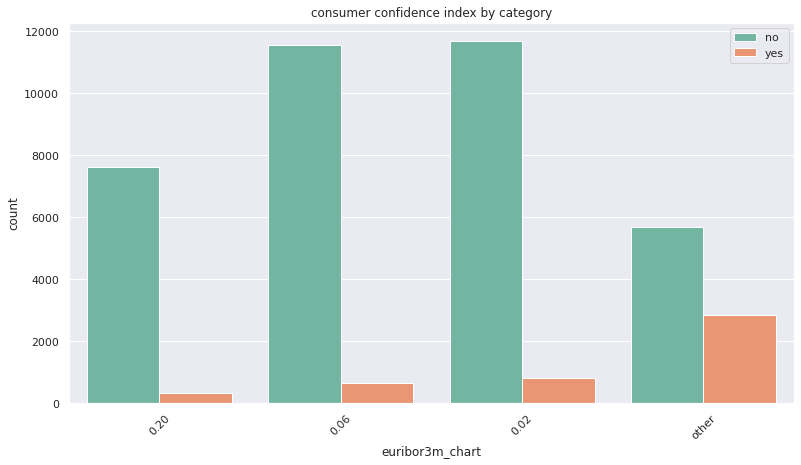

In [1108]:
chart = sns.countplot(df['euribor3m_chart'], hue=df['y'], palette='Set2')
 
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('consumer confidence index by category')
plt.legend();

In [1109]:
cross_yee = cross([df['y'], df['nr.employed']] , normalize=False)
cross_yee[0]

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,334,370,281,617,84,1069,7442,9,7523,3451,15368
yes,301,403,369,454,88,594,1092,1,240,232,866


In [1110]:
chi_squred(cross_yee[1])

stat=6975.058, p=0.000
Probably dependent


# nr.employed

number of employees - quarterly indicator (numeric)

In [1111]:
df['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

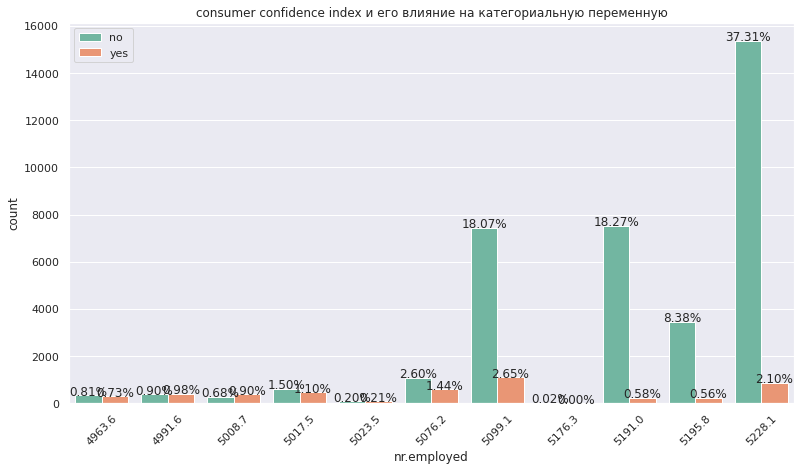

In [1112]:
chart = sns.countplot(df['nr.employed'], hue=df['y'], palette='Set2')

total = float(len(df))
for p in chart.patches:
    height = p.get_height()
    chart.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(100*height/total),
            ha="center")  
    
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title('consumer confidence index и его влияние на категориальную переменную')
plt.legend();

In [1113]:
cross_yne = cross([df['y'], df['nr.employed']] , normalize=False)
cross_yne[0]

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,334,370,281,617,84,1069,7442,9,7523,3451,15368
yes,301,403,369,454,88,594,1092,1,240,232,866


In [1114]:
cross_yne_c = cross([df['y'], df['nr.employed']] , normalize='columns')
cross_yne_c[0]

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,0.525984,0.478655,0.432308,0.576097,0.488372,0.642814,0.872041,0.900000,0.969084,0.937008,0.946655
yes,0.474016,0.521345,0.567692,0.423903,0.511628,0.357186,0.127959,0.100000,0.030916,0.062992,0.053345


In [1115]:
cross_yne_t = cross([df['y'], df['nr.employed']] , normalize=True)
cross_yne_t[0]

nr.employed,4963.6,4991.6,5008.7,5017.5,5023.5,5076.2,5099.1,5176.3,5191.0,5195.8,5228.1
y,,,,,,,,,,,
no,0.008109,0.008983,0.006822,0.014980,0.002039,0.025954,0.180684,0.000219,0.182650,0.083787,0.373118
yes,0.007308,0.009784,0.008959,0.011023,0.002137,0.014422,0.026513,0.000024,0.005827,0.005633,0.021026


In [1116]:
chi_squred(cross_yne[1])

stat=6975.058, p=0.000
Probably dependent


-

-

# Multivariate analysis

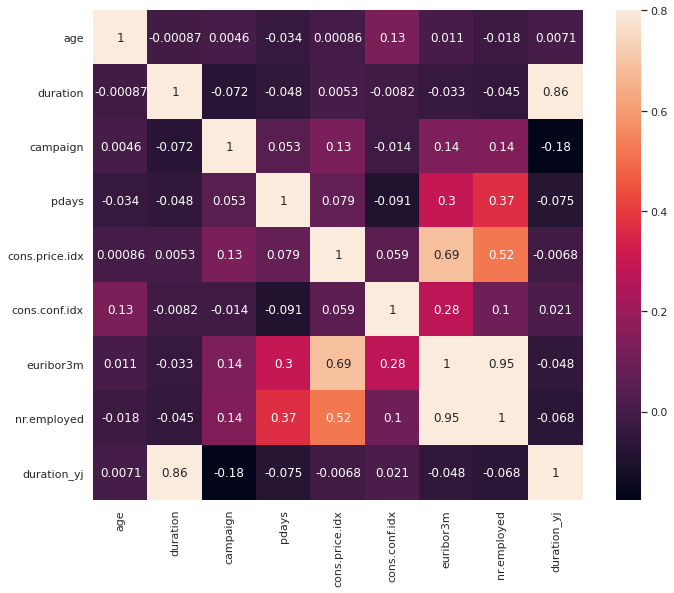

In [1117]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

/home/egor/anaconda3/envs/py_3.8.5_j/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



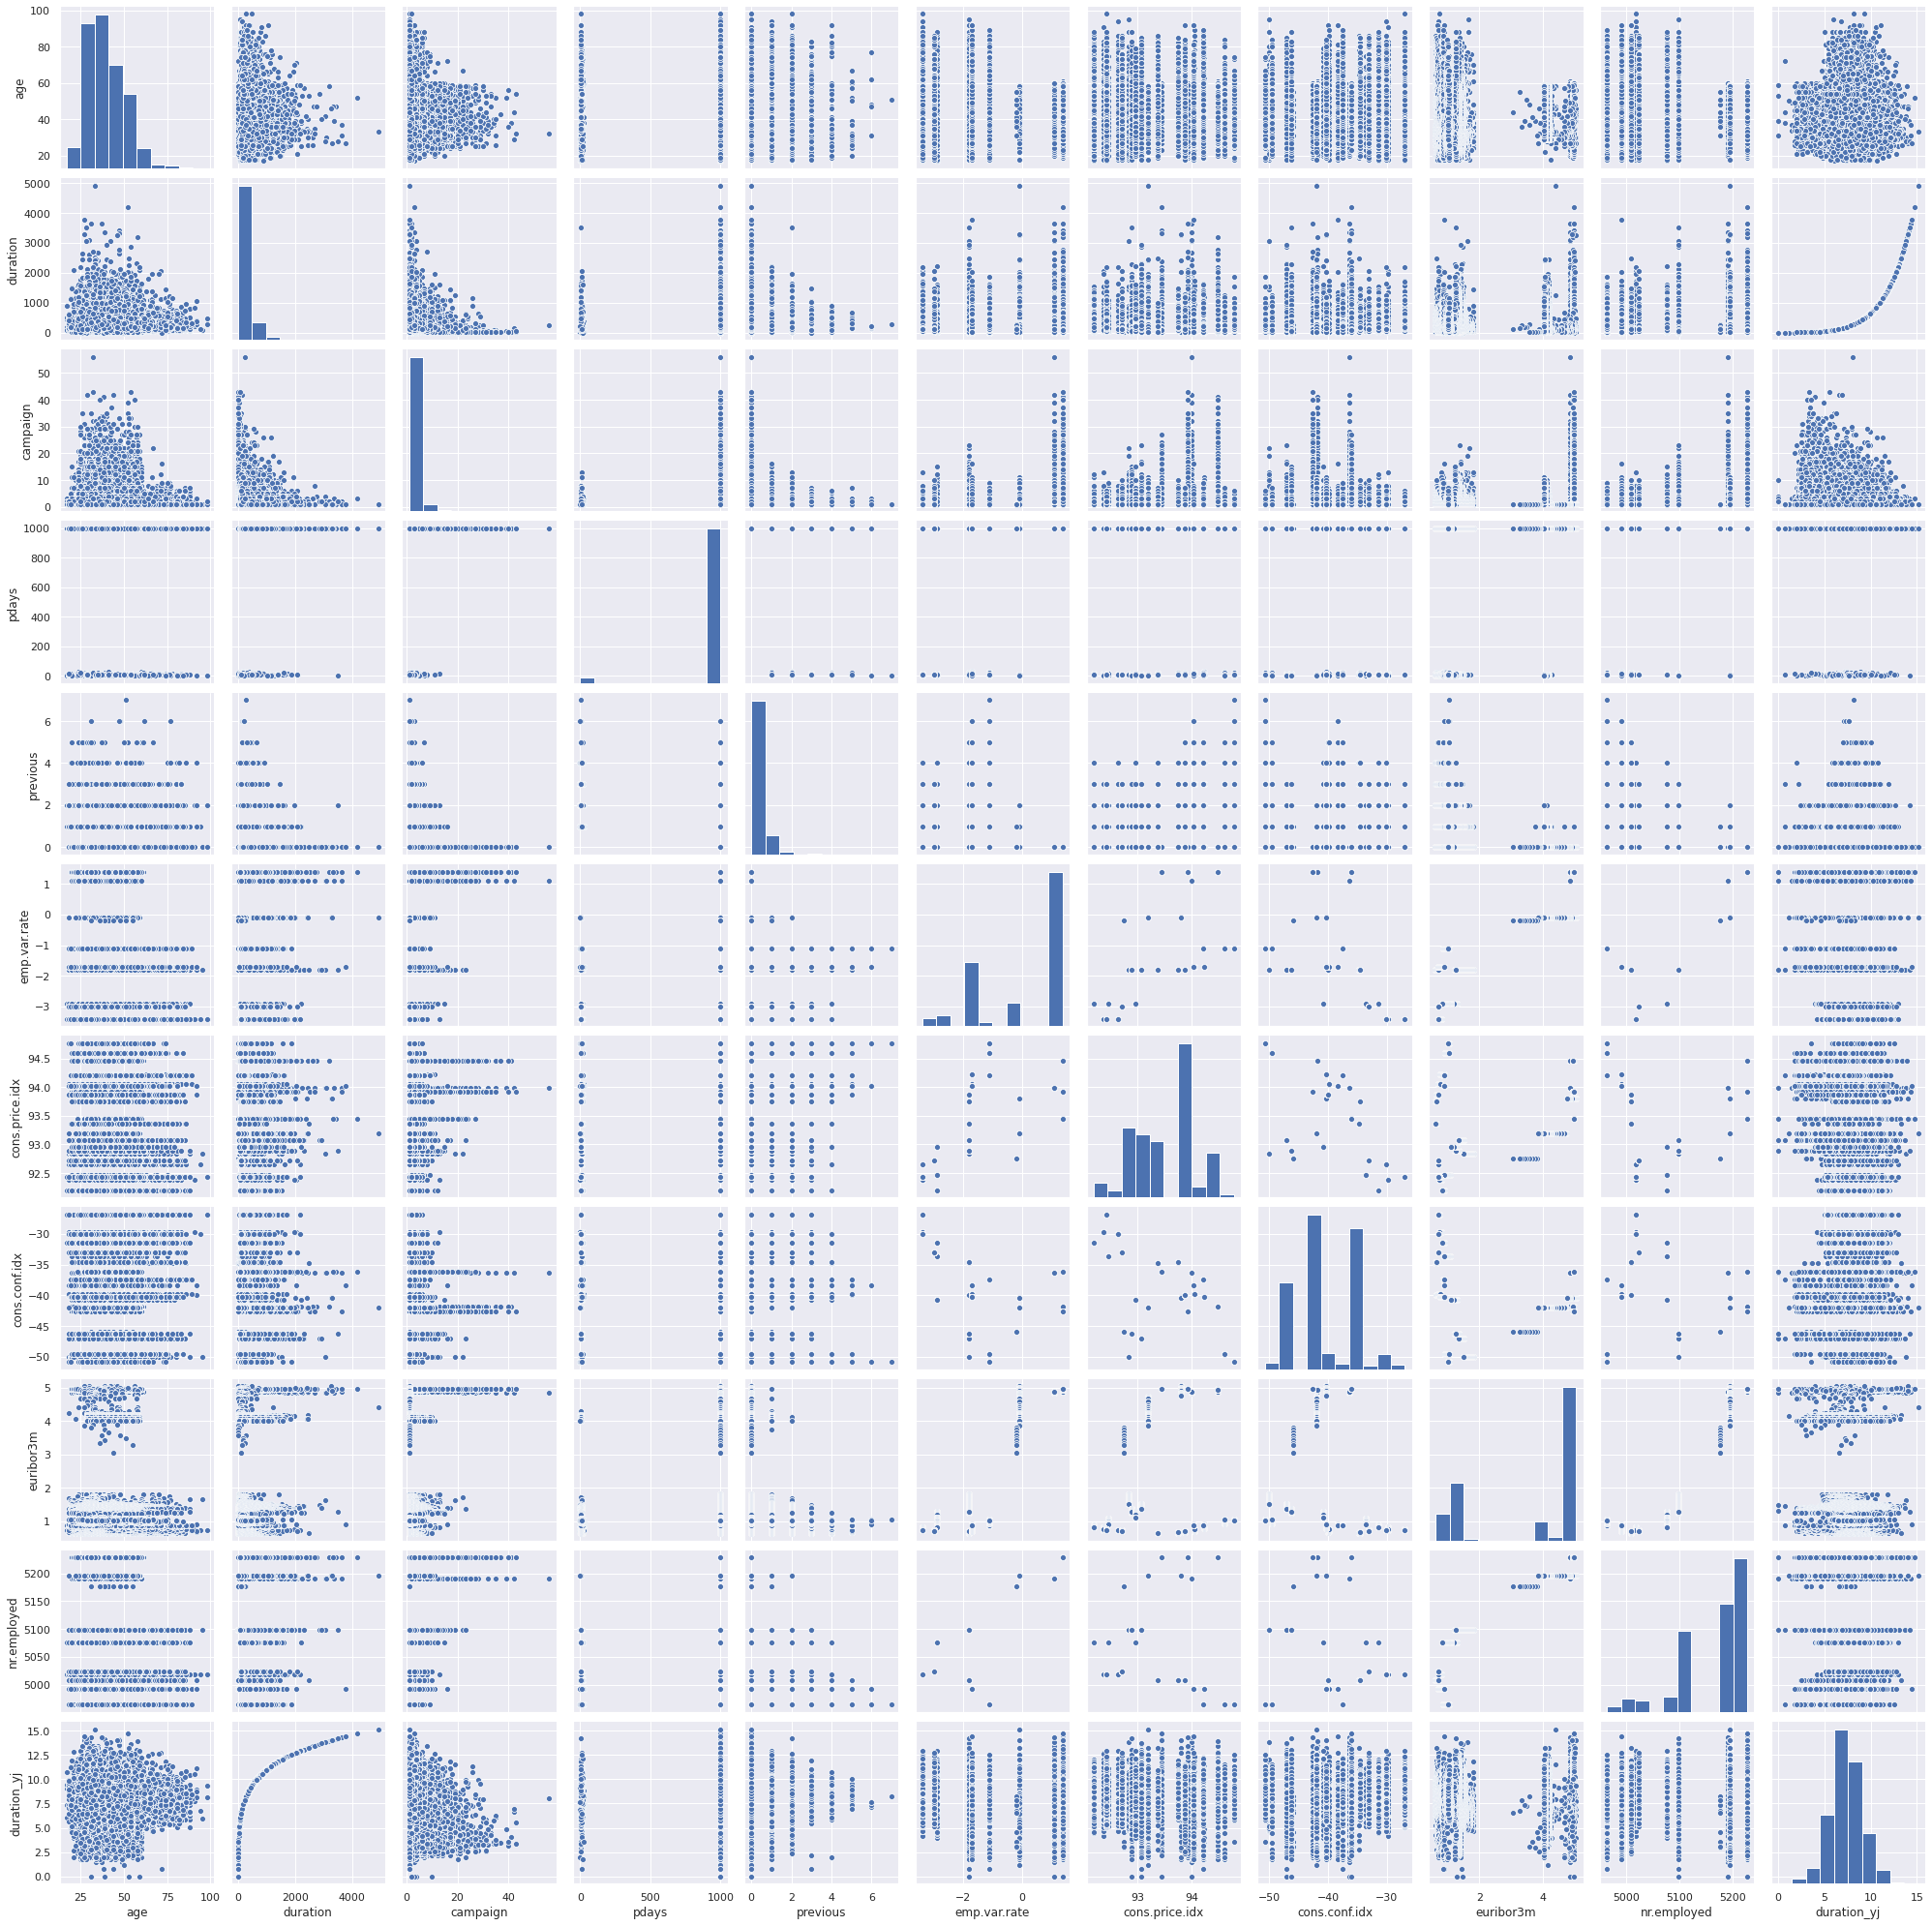

In [1118]:
sns.pairplot(df, size = 2.5, palette='Set2')
plt.show();

<AxesSubplot:>

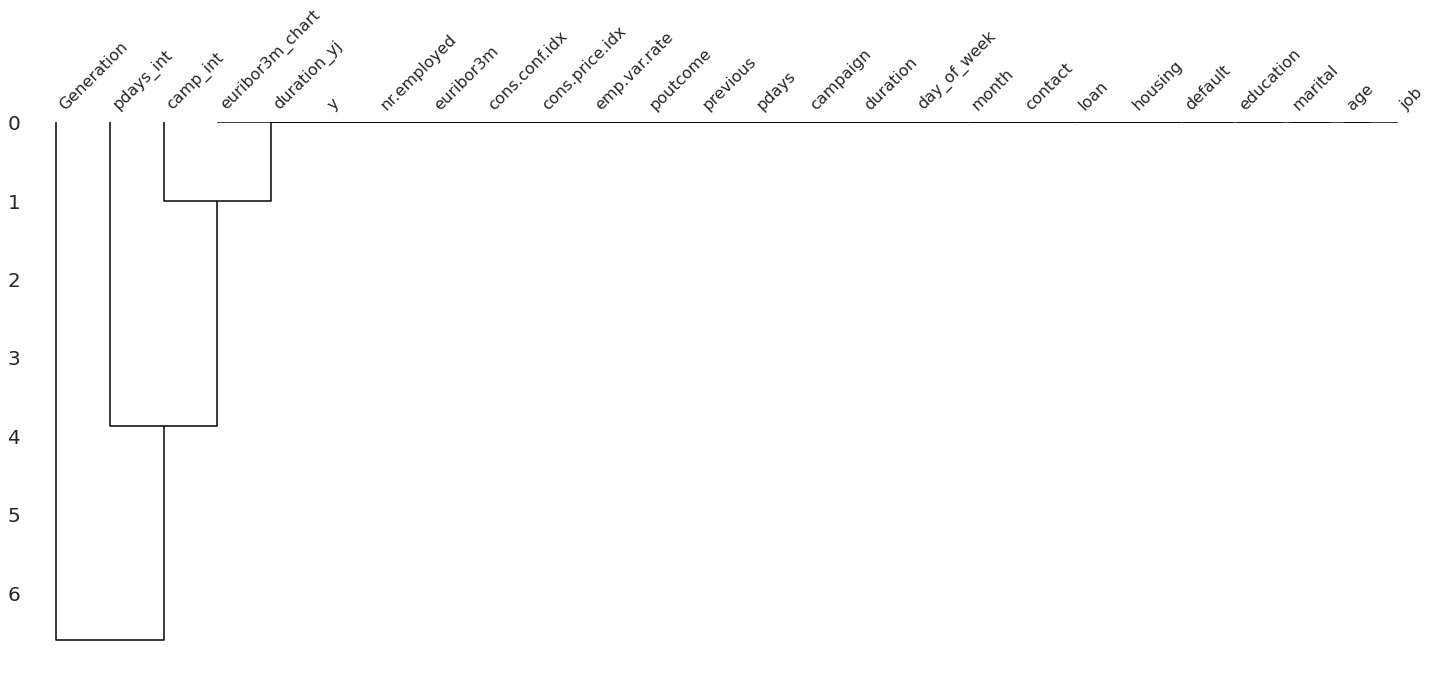

In [1119]:
msno.dendrogram(df)

In [1120]:
df.skew(), df.kurt()

(age               0.784697
 duration          3.263141
 campaign          4.762507
 pdays            -4.922190
 cons.price.idx   -0.230888
 cons.conf.idx     0.303180
 euribor3m        -0.709188
 nr.employed      -1.044262
 duration_yj       0.016940
 dtype: float64,
 age                0.791312
 duration          20.247938
 campaign          36.979795
 pdays             22.229463
 cons.price.idx    -0.829809
 cons.conf.idx     -0.358558
 euribor3m         -1.406803
 nr.employed       -0.003760
 duration_yj        0.429858
 dtype: float64)

<AxesSubplot:xlabel='Skewness'>

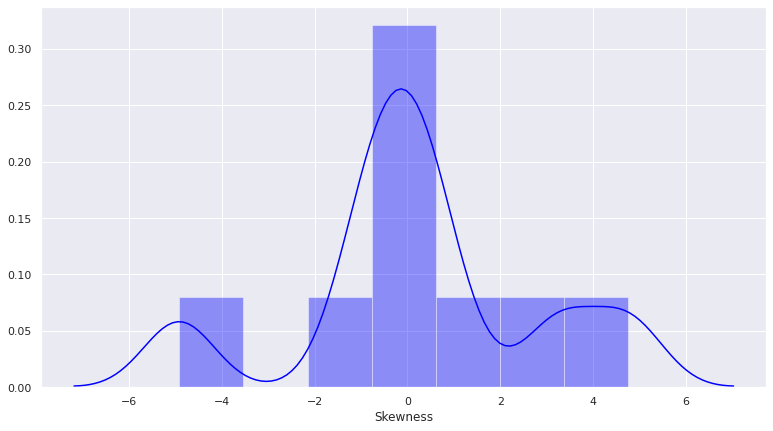

In [1121]:
sns.distplot(df.skew(),color='blue',axlabel ='Skewness')

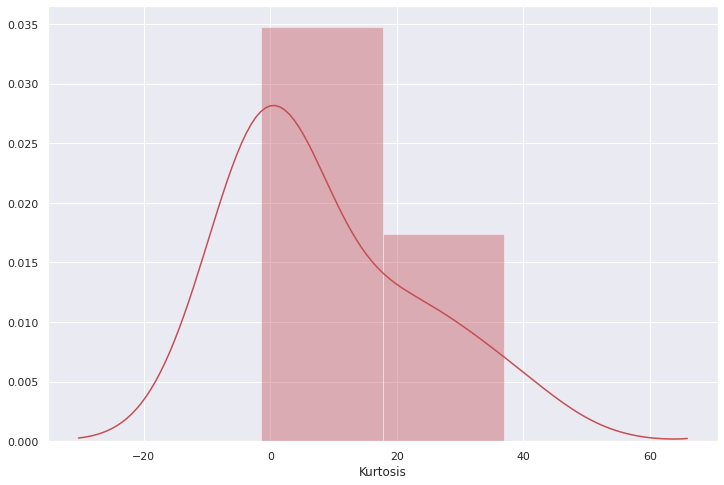

In [1122]:
plt.figure(figsize = (12,8))
sns.distplot(df.kurt(),color='r',axlabel ='Kurtosis',norm_hist= False, kde = True,rug = False)
#plt.hist(train.kurt(),orientation = 'vertical',histtype = 'bar',label ='Kurtosis', color ='blue')
plt.show()

In [1123]:
def round_int(x):
    if x == float("inf") or x == float("-inf"):
        return float('nan') # or x or return whatever makes sense
    return int(round(x))

Больше маленьких значений, чем больших.

<AxesSubplot:xlabel='Skewness'>

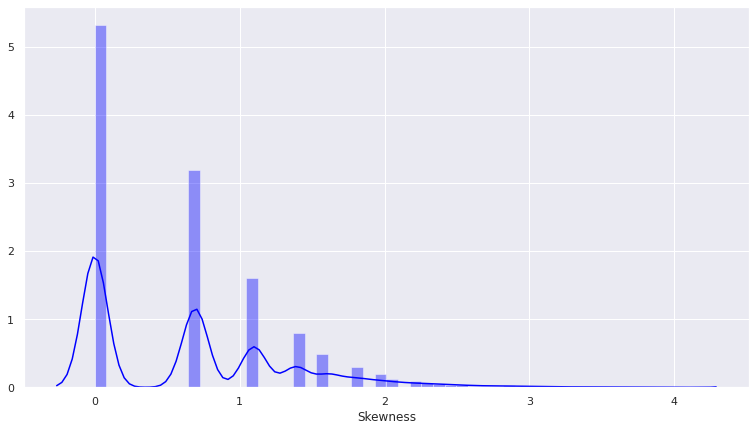

In [1124]:
target = np.log(df['campaign'])
target.skew()
sns.distplot(target,color='blue',axlabel ='Skewness')

# Part 2: DR

Use the same dataset you've used during this module. It would be nice if you save the result from the data preparation step and use it in the current task.
The main goal here is to use different dimensionality reduction techniques and show results


## at least 3 different dimensionality reductions techniques (SVD, t-SNE, PCA, NMF, UMAP) used - 4 points

## t-sne 

t-distributed Stochastic Neighbor Embedding.

## Preparation 

In [3]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'duration_yj']

In [7]:
#df = pd.read_csv('data/interim/df_after_part_1.csv')
#df.drop('Unnamed: 0', axis= 1, inplace=True)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Generation,duration_yj,camp_int,pdays_int,euribor3m_chart
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.048817,0-8,999,0.20
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,6.967713,0-8,999,0.20
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,GenX,7.763607,0-8,999,0.20
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,GenX,6.992524,0-8,999,0.20
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.376747,0-8,999,0.20


In [9]:
dp = df.copy()

In [1131]:
#dp.to_csv('data/interim/dp.csv')

In [1129]:
#df.to_csv('data/interim/df_after_part_1.csv')

In [44]:
# dp = pd.read_csv('data/interim/dp.csv', index_col=0)

In [47]:
dp.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Generation,duration_yj,camp_int,pdays_int,euribor3m_chart
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.048817,0-8,999,0.20
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,6.967713,0-8,999,0.20
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,GenX,7.763607,0-8,999,0.20
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,GenX,6.992524,0-8,999,0.20
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,93.994,-36.4,4.857,5191.0,no,BabyBoom,8.376747,0-8,999,0.20


In [48]:
num

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'duration_yj']

In [49]:
scaler = StandardScaler()

In [50]:
dp[num] = scaler.fit_transform(dp[num])

In [51]:
dp[df.columns.difference(num)].head()

,Generation,camp_int,contact,day_of_week,default,education,euribor3m_chart,housing,job,loan,marital,month,pdays_int,poutcome,y
0,BabyBoom,0-8,telephone,mon,no,basic.4y,0.20,no,housemaid,no,married,may,999,nonexistent,no
1,BabyBoom,0-8,telephone,mon,unknown,high.school,0.20,no,services,no,married,may,999,nonexistent,no
2,GenX,0-8,telephone,mon,no,high.school,0.20,yes,services,no,married,may,999,nonexistent,no
3,GenX,0-8,telephone,mon,no,basic.6y,0.20,no,admin.,no,married,may,999,nonexistent,no
4,BabyBoom,0-8,telephone,mon,no,high.school,0.20,no,services,yes,married,may,999,nonexistent,no


In [52]:
columns = list(df.columns.difference(num))

In [53]:
columns = columns[:-1]

In [54]:
dp_c = pd.get_dummies(dp, columns=columns)

In [56]:
y = dp_c.loc[:, "y"]

In [57]:
dp_c.drop('y', axis=1, inplace=True)

In [58]:
dp_c.shape

(41188, 86)

## Now we have the dataframe after standatrization and one-hot-encoding

In [59]:
#dp_c.to_csv('data/model/df_for_dp.csv')

In [60]:
#y.to_csv('data/model/y.csv')

In [4]:
#y = pd.read_csv('data/model/y.csv' , index_col=0)

In [5]:
#dp_c = pd.read_csv('data/model/df_for_dp.csv' , index_col=0)

In [6]:
df_tsne = dp_c.copy() 

In [7]:
x_tnse = TSNE(n_components=2).fit_transform(df_tsne)

In [8]:
x = pd.DataFrame(x_tnse, columns=['1','2'])

In [10]:
#x.to_csv('data/model/x_tsne')

In [14]:
y['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

<AxesSubplot:xlabel='1', ylabel='2'>

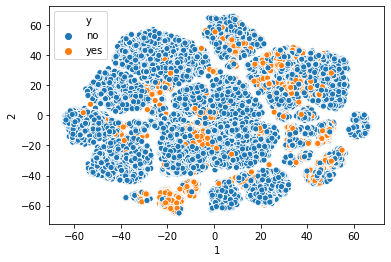

In [15]:
sns.scatterplot(x=x['1'], y=x['2'], hue= y['y'])